# 02 - Keşifsel Veri Analizi ve Görselleştirme (EDA)

Bu notebook'ta temizlenmiş veriyi görselleştirip detaylı analiz yapacağız.

**Hedef:** 20+ görselleştirme ile veriyi anlamak

**Kullanılacak Araçlar:**
- Matplotlib
- Seaborn

## 1. Kütüphaneleri Yükle

In [1]:
# Veri İşleme
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# İstatistiksel analiz
from scipy import stats

# Uyarıları gizle
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
sns.set_style('whitegrid')
sns.set_palette('husl')

print('✅ Kütüphaneler yüklendi!')
print(f'📦 Pandas: {pd.__version__}')
print(f'📦 Matplotlib: {plt.matplotlib.__version__}')
print(f'📦 Seaborn: {sns.__version__}')

✅ Kütüphaneler yüklendi!
📦 Pandas: 2.1.4
📦 Matplotlib: 3.10.1
📦 Seaborn: 0.13.2


## 2. Temiz Veriyi Yükle

In [2]:
# Temizlenmiş veriyi oku
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Tarih sütununu datetime'a çevir
df['capture_date'] = pd.to_datetime(df['capture_date'])

print('='*60)
print('VERİ SETİ BİLGİLERİ')
print('='*60)
print(f'📊 Toplam kayıt: {len(df):,}')
print(f'📊 Sütun sayısı: {len(df.columns)}')
print(f'📊 Tarih aralığı: {df["capture_date"].min().strftime("%d %B %Y")} - {df["capture_date"].max().strftime("%d %B %Y")}')
print(f'📊 Süpermarket sayısı: {df["supermarket_name"].nunique()}')
print(f'📊 Kategori sayısı: {df["category_name"].nunique()}')
print(f'📊 Benzersiz ürün: {df["product_name"].nunique():,}')
print(f'\n✅ Veri yüklendi!')

VERİ SETİ BİLGİLERİ
📊 Toplam kayıt: 44,495
📊 Sütun sayısı: 17
📊 Tarih aralığı: 09 January 2024 - 13 April 2024
📊 Süpermarket sayısı: 5
📊 Kategori sayısı: 11
📊 Benzersiz ürün: 1,579

✅ Veri yüklendi!


In [3]:
# İlk bakış
display(df.head(10))

,product_name,supermarket_name,category_name,price_gbp,price_unit_gbp,unit,price_category,capture_date,year,month,month_name,day,day_of_week,day_name,week,is_weekend,is_own_brand
0,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.970,l,Pahalı,2024-03-22,2024,3,March,22,4,Friday,12,0,False
1,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.970,l,Pahalı,2024-04-06,2024,4,April,6,5,Saturday,14,1,False
2,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.970,l,Pahalı,2024-04-04,2024,4,April,4,3,Thursday,14,0,False
3,19 Crimes Chardonnay,Morrisons,drinks,8.0,10.640,l,Pahalı,2024-02-24,2024,2,February,24,5,Saturday,8,1,False
4,19 Crimes Chardonnay,Morrisons,drinks,8.0,10.640,l,Pahalı,2024-02-22,2024,2,February,22,3,Thursday,8,0,False
5,19 Crimes Chardonnay,ASDA,drinks,8.0,10.664,l,Pahalı,2024-03-22,2024,3,March,22,4,Friday,12,0,False
6,19 Crimes Chardonnay,Morrisons,drinks,8.0,10.640,l,Pahalı,2024-02-09,2024,2,February,9,4,Friday,6,0,False
7,19 Crimes Chardonnay,Morrisons,drinks,8.0,10.640,l,Pahalı,2024-02-28,2024,2,February,28,2,Wednesday,9,0,False
8,19 Crimes Chardonnay,ASDA,drinks,9.5,12.664,l,Pahalı,2024-04-06,2024,4,April,6,5,Saturday,14,1,False
9,19 Crimes Chardonnay,ASDA,drinks,9.5,12.664,l,Pahalı,2024-04-04,2024,4,April,4,3,Thursday,14,0,False


## 3. Temel İstatistiksel Özet

In [4]:
# Sayısal sütunlar özeti
print('📈 Fiyat İstatistikleri:')
print(df[['price_gbp', 'price_unit_gbp']].describe())

📈 Fiyat İstatistikleri:
          price_gbp  price_unit_gbp
count  44495.000000    44495.000000
mean       6.579929       22.848979
std       10.190719      112.985686
min        0.300000        0.001000
25%        2.000000        1.070000
50%        3.500000        4.200000
75%        7.000000       12.000000
max      160.000000     7755.600000


In [5]:
# Kategorik sütunlar özeti
print('='*60)
print('KATEGORİK DEĞİŞKENLER')
print('='*60)

print(f'\n🏪 SÜPERMARKETLER:')
print(df['supermarket_name'].value_counts())

print(f'\n📦 KATEGORİLER:')
print(df['category_name'].value_counts())

print(f'\n📏 BİRİMLER:')
print(df['unit'].value_counts())

print(f'\n💰 FİYAT KATEGORİLERİ:')
print(df['price_category'].value_counts())

KATEGORİK DEĞİŞKENLER

🏪 SÜPERMARKETLER:
supermarket_name
ASDA         17472
Sains        10960
Morrisons     9772
Tesco         6269
Aldi            22
Name: count, dtype: int64

📦 KATEGORİLER:
category_name
food_cupboard      10748
drinks              9770
health_products     9669
fresh_food          3890
free-from           2172
home                2037
household           1702
frozen              1645
baby_products       1015
bakery               968
pets                 879
Name: count, dtype: int64

📏 BİRİMLER:
unit
kg      19359
l       15716
unit     9420
Name: count, dtype: int64

💰 FİYAT KATEGORİLERİ:
price_category
Orta      15309
Ucuz      14901
Pahalı    14285
Name: count, dtype: int64


---
# 📊 PART 1: FİYAT ANALİZLERİ
---

## 4. Fiyat Dağılımı Analizi

💾 Grafik kaydedildi: 01_price_distribution.png


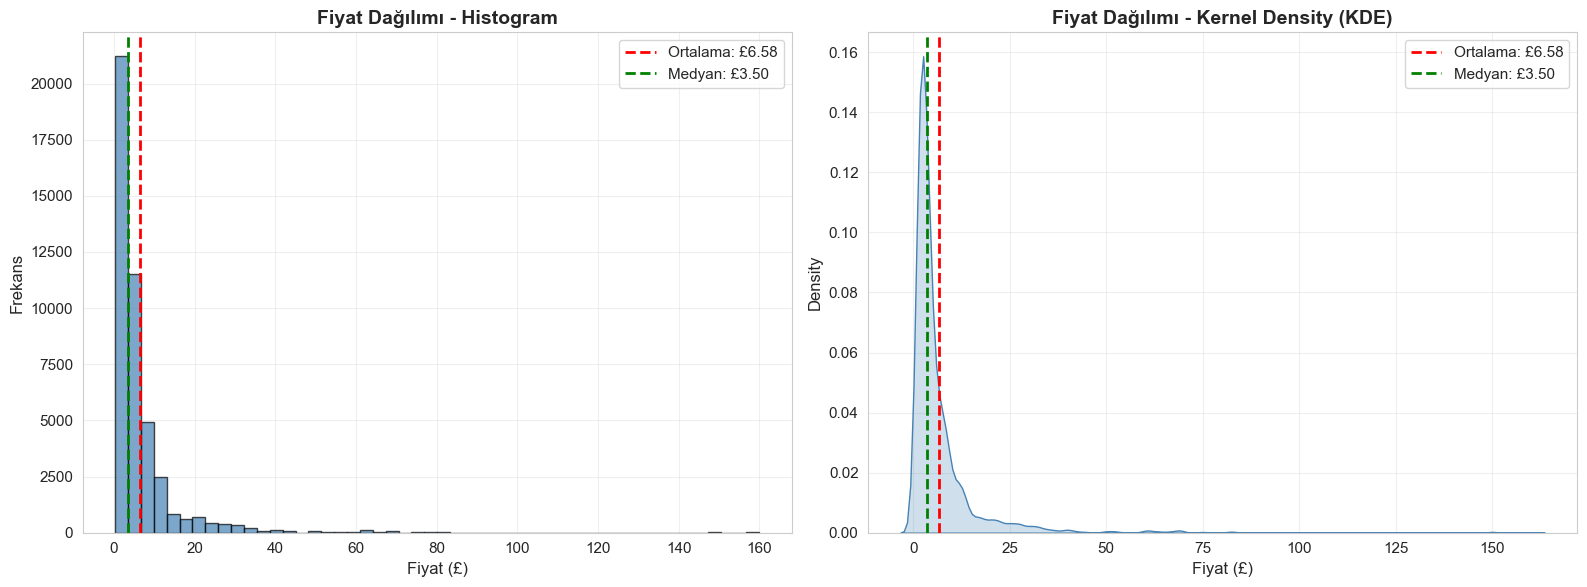

In [11]:
# Grafik 1: Genel Fiyat Dağılımı (Histogram + KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['price_gbp'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['price_gbp'].mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: £{df["price_gbp"].mean():.2f}')
axes[0].axvline(df['price_gbp'].median(), color='green', linestyle='--', linewidth=2, label=f'Medyan: £{df["price_gbp"].median():.2f}')
axes[0].set_xlabel('Fiyat (£)')
axes[0].set_ylabel('Frekans')
axes[0].set_title('Fiyat Dağılımı - Histogram', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# KDE Plot
sns.kdeplot(data=df, x='price_gbp', fill=True, color='steelblue', ax=axes[1])
axes[1].axvline(df['price_gbp'].mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: £{df["price_gbp"].mean():.2f}')
axes[1].axvline(df['price_gbp'].median(), color='green', linestyle='--', linewidth=2, label=f'Medyan: £{df["price_gbp"].median():.2f}')
axes[1].set_xlabel('Fiyat (£)')
axes[1].set_title('Fiyat Dağılımı - Kernel Density (KDE)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/01_price_distribution.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 01_price_distribution.png')
plt.show()

💾 Grafik kaydedildi: 02_price_category.png


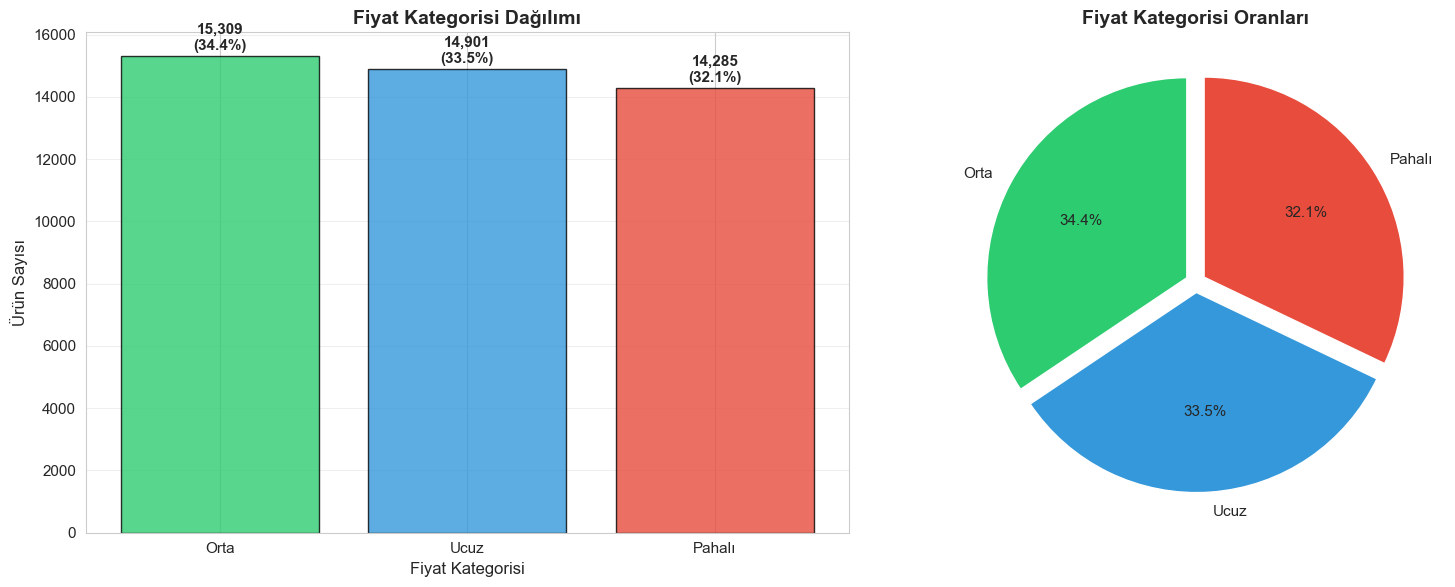

In [12]:
# Grafik 2: Fiyat Kategorisi Dağılımı
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart
price_cat_counts = df['price_category'].value_counts()
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[0].bar(price_cat_counts.index, price_cat_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Fiyat Kategorisi')
axes[0].set_ylabel('Ürün Sayısı')
axes[0].set_title('Fiyat Kategorisi Dağılımı', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Yüzde gösterimi
for i, v in enumerate(price_cat_counts.values):
    axes[0].text(i, v + 200, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')

# Pie Chart
axes[1].pie(price_cat_counts.values, labels=price_cat_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Fiyat Kategorisi Oranları', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/02_price_category.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 02_price_category.png')
plt.show()

---
# 🏪 PART 2: SÜPERMARKET ANALİZLERİ
---

## 5. Süpermarket Karşılaştırmaları

💾 Grafik kaydedildi: 03_supermarket_counts.png


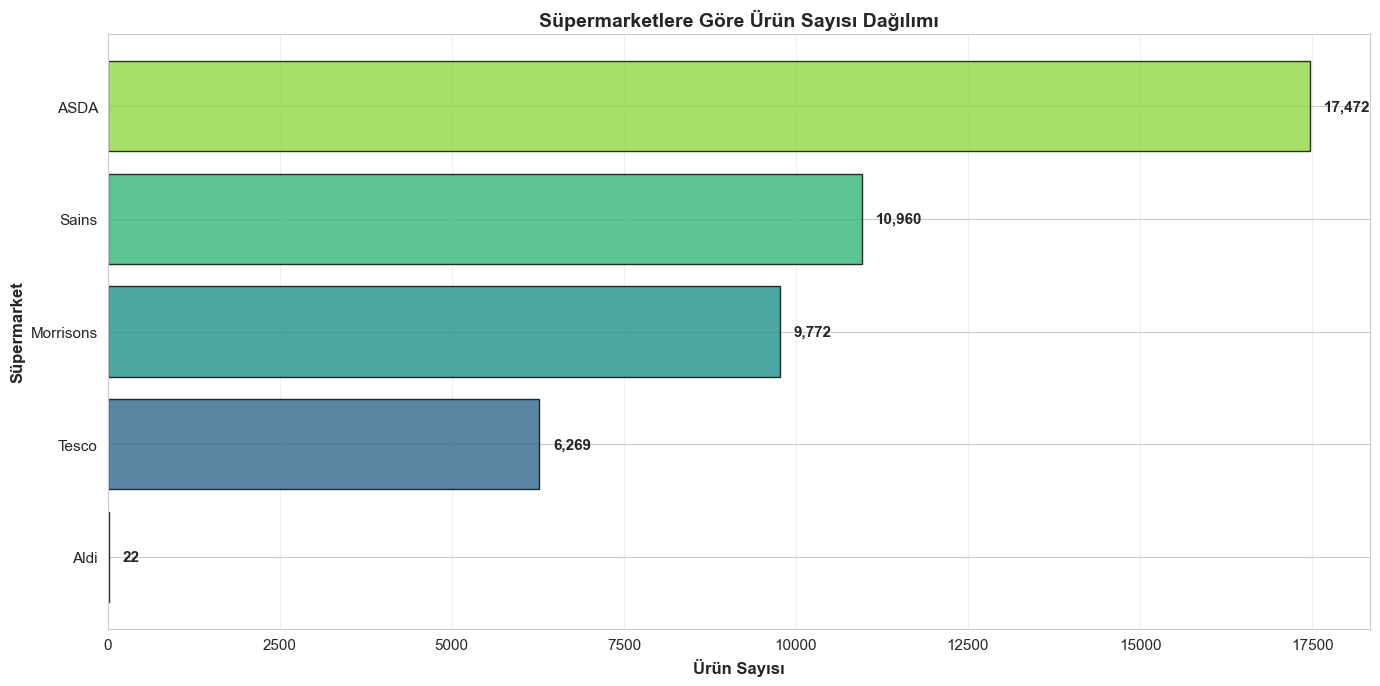

In [13]:
# Grafik 3: Süpermarket Ürün Sayıları
fig, ax = plt.subplots(figsize=(14, 7))

supermarket_counts = df['supermarket_name'].value_counts().sort_values(ascending=True)
colors_sm = sns.color_palette('viridis', len(supermarket_counts))

bars = ax.barh(supermarket_counts.index, supermarket_counts.values, color=colors_sm, edgecolor='black', alpha=0.8)
ax.set_xlabel('Ürün Sayısı', fontweight='bold')
ax.set_ylabel('Süpermarket', fontweight='bold')
ax.set_title('Süpermarketlere Göre Ürün Sayısı Dağılımı', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Değerleri çubukların üzerine yaz
for bar in bars:
    width = bar.get_width()
    ax.text(width + 200, bar.get_y() + bar.get_height()/2, 
            f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/03_supermarket_counts.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 03_supermarket_counts.png')
plt.show()

💾 Grafik kaydedildi: 04_supermarket_prices.png


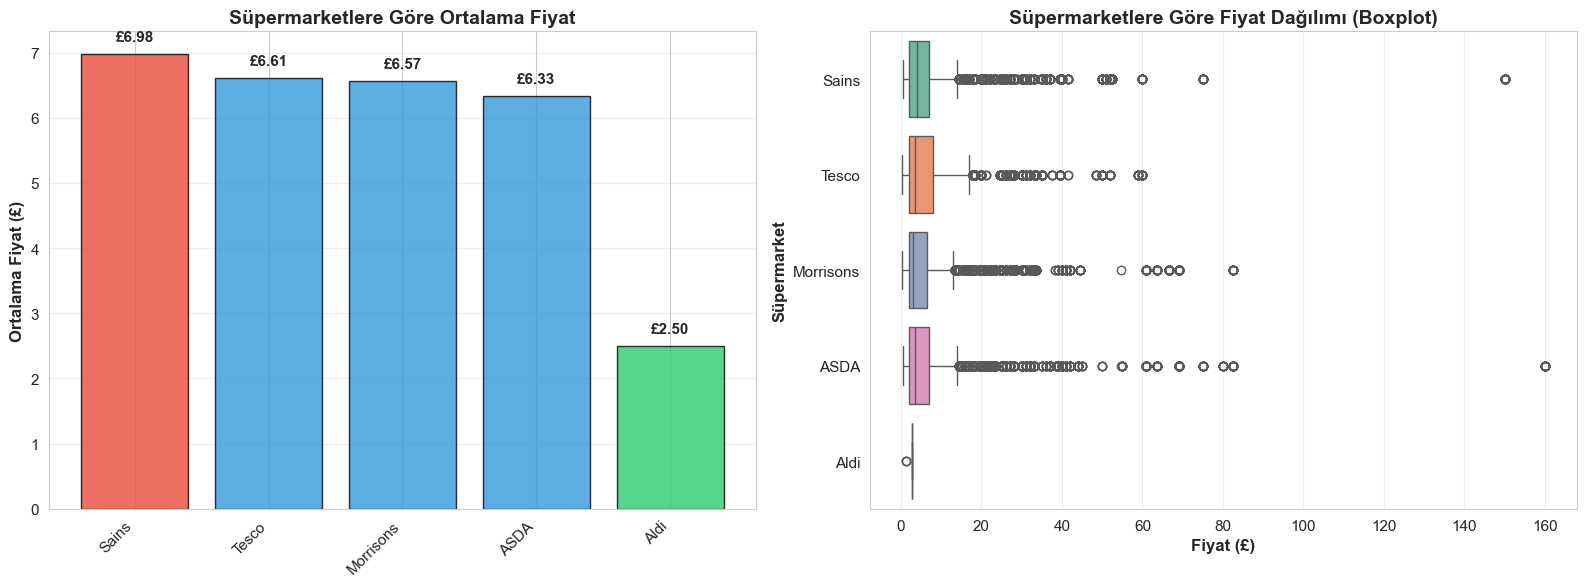

In [14]:
# Grafik 4: Süpermarket Ortalama Fiyat Karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart - Ortalama Fiyat
avg_prices = df.groupby('supermarket_name')['price_gbp'].mean().sort_values(ascending=False)
colors_avg = ['#e74c3c' if x == avg_prices.max() else '#2ecc71' if x == avg_prices.min() else '#3498db' for x in avg_prices]

axes[0].bar(range(len(avg_prices)), avg_prices.values, color=colors_avg, edgecolor='black', alpha=0.8)
axes[0].set_xticks(range(len(avg_prices)))
axes[0].set_xticklabels(avg_prices.index, rotation=45, ha='right')
axes[0].set_ylabel('Ortalama Fiyat (£)', fontweight='bold')
axes[0].set_title('Süpermarketlere Göre Ortalama Fiyat', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Değerler
for i, v in enumerate(avg_prices.values):
    axes[0].text(i, v + 0.2, f'£{v:.2f}', ha='center', fontweight='bold')

# Boxplot - Fiyat Dağılımı
supermarkets_order = avg_prices.index
sns.boxplot(data=df, y='supermarket_name', x='price_gbp', order=supermarkets_order, 
            palette='Set2', ax=axes[1])
axes[1].set_xlabel('Fiyat (£)', fontweight='bold')
axes[1].set_ylabel('Süpermarket', fontweight='bold')
axes[1].set_title('Süpermarketlere Göre Fiyat Dağılımı (Boxplot)', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../outputs/figures/04_supermarket_prices.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 04_supermarket_prices.png')
plt.show()

💾 Grafik kaydedildi: 05_supermarket_price_category.png


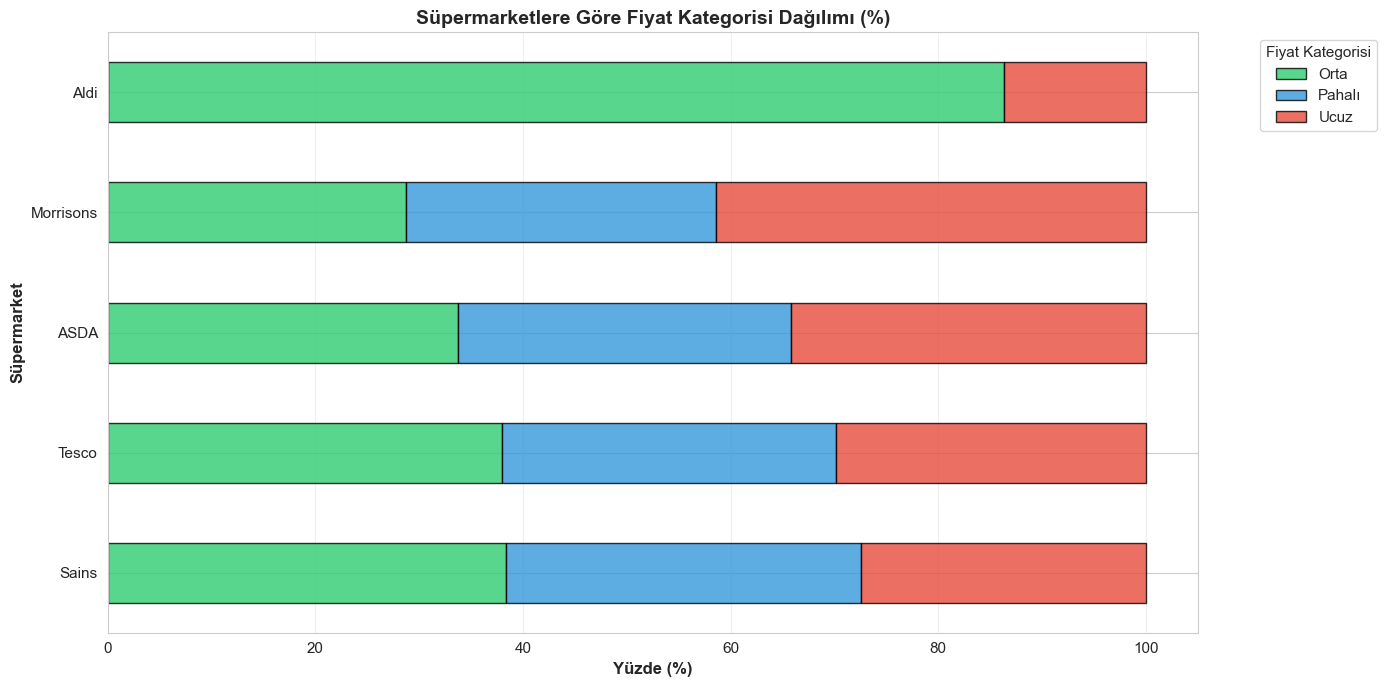

In [15]:
# Grafik 5: Süpermarket Fiyat Kategorisi Dağılımı (Stacked Bar)
fig, ax = plt.subplots(figsize=(14, 7))

price_cat_pivot = pd.crosstab(df['supermarket_name'], df['price_category'], normalize='index') * 100
price_cat_pivot = price_cat_pivot.sort_values('Pahalı', ascending=False)

price_cat_pivot.plot(kind='barh', stacked=True, ax=ax, 
                     color=['#2ecc71', '#3498db', '#e74c3c'], 
                     edgecolor='black', alpha=0.8)

ax.set_xlabel('Yüzde (%)', fontweight='bold')
ax.set_ylabel('Süpermarket', fontweight='bold')
ax.set_title('Süpermarketlere Göre Fiyat Kategorisi Dağılımı (%)', fontweight='bold', fontsize=14)
ax.legend(title='Fiyat Kategorisi', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../outputs/figures/05_supermarket_price_category.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 05_supermarket_price_category.png')
plt.show()

---
# 📦 PART 3: KATEGORİ ANALİZLERİ
---

## 6. Kategori Bazlı Analizler

💾 Grafik kaydedildi: 06_category_counts.png


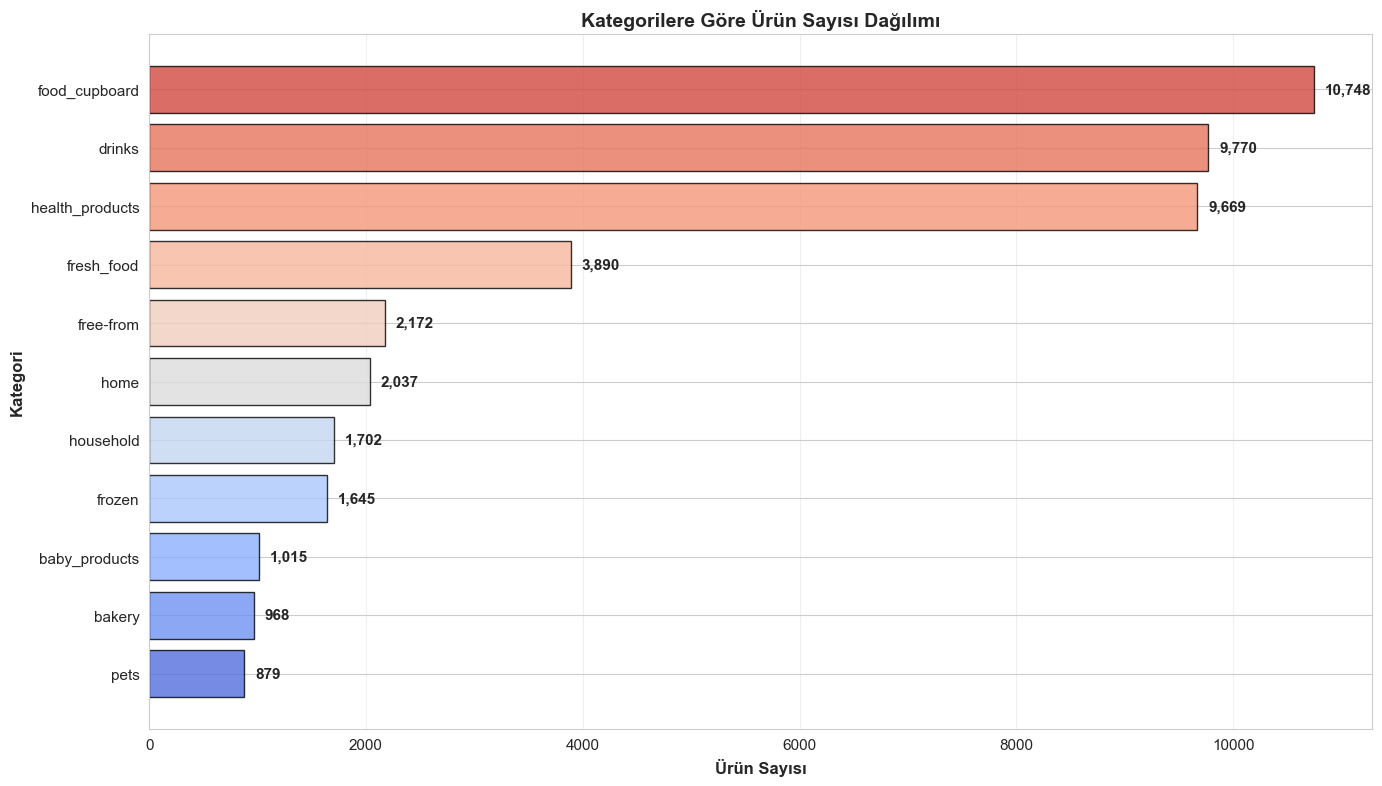

In [16]:
# Grafik 6: Kategori Ürün Sayıları
fig, ax = plt.subplots(figsize=(14, 8))

category_counts = df['category_name'].value_counts().sort_values(ascending=True)
colors_cat = sns.color_palette('coolwarm', len(category_counts))

bars = ax.barh(category_counts.index, category_counts.values, color=colors_cat, edgecolor='black', alpha=0.8)
ax.set_xlabel('Ürün Sayısı', fontweight='bold')
ax.set_ylabel('Kategori', fontweight='bold')
ax.set_title('Kategorilere Göre Ürün Sayısı Dağılımı', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Değerleri yaz
for bar in bars:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2, 
            f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/06_category_counts.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 06_category_counts.png')
plt.show()

💾 Grafik kaydedildi: 07_category_avg_price.png


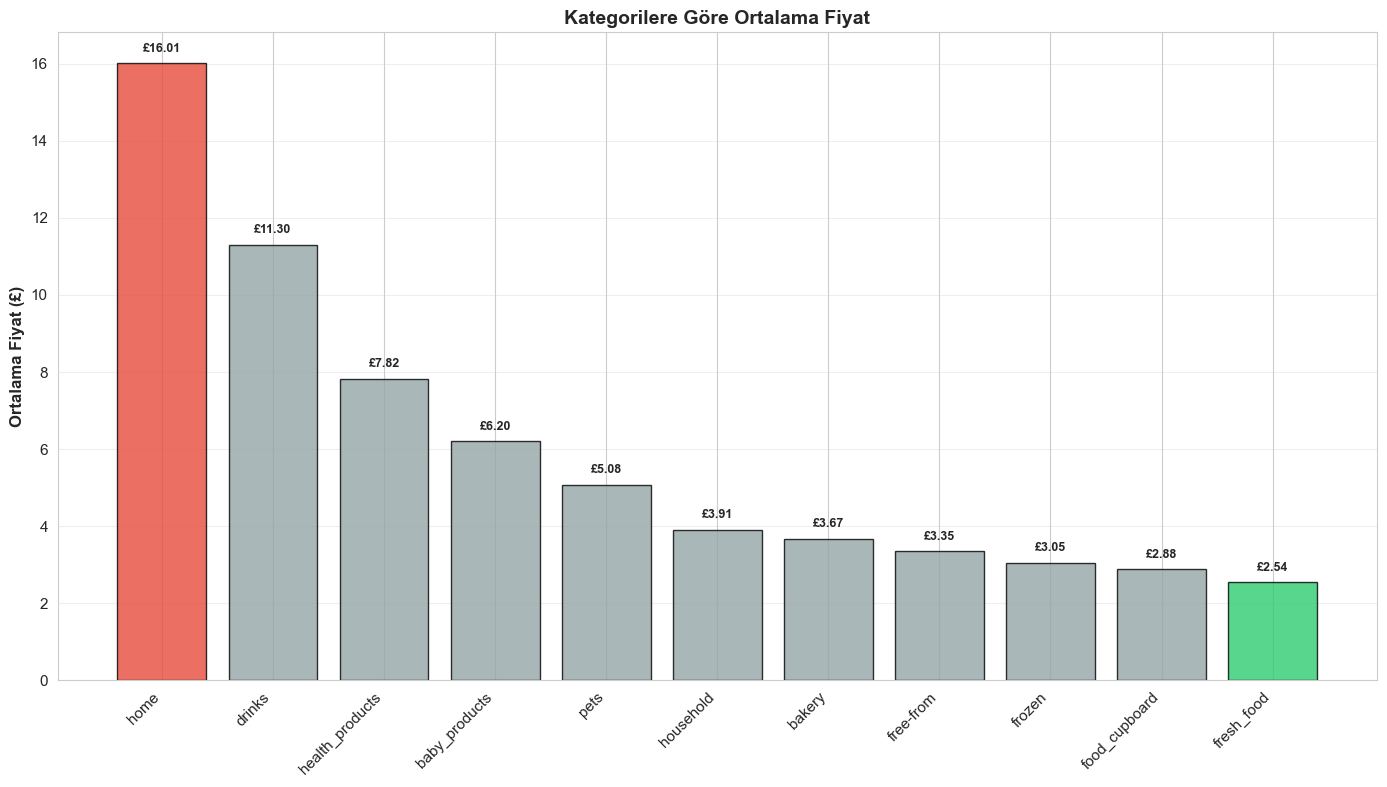

In [17]:
# Grafik 7: Kategori Ortalama Fiyatları
fig, ax = plt.subplots(figsize=(14, 8))

category_avg_price = df.groupby('category_name')['price_gbp'].mean().sort_values(ascending=False)
colors_cat_price = ['#e74c3c' if x == category_avg_price.max() else '#2ecc71' if x == category_avg_price.min() else '#95a5a6' for x in category_avg_price]

bars = ax.bar(range(len(category_avg_price)), category_avg_price.values, 
              color=colors_cat_price, edgecolor='black', alpha=0.8)
ax.set_xticks(range(len(category_avg_price)))
ax.set_xticklabels(category_avg_price.index, rotation=45, ha='right')
ax.set_ylabel('Ortalama Fiyat (£)', fontweight='bold')
ax.set_title('Kategorilere Göre Ortalama Fiyat', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

# Değerleri yaz
for i, v in enumerate(category_avg_price.values):
    ax.text(i, v + 0.3, f'£{v:.2f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/figures/07_category_avg_price.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 07_category_avg_price.png')
plt.show()

💾 Grafik kaydedildi: 08_category_violin.png


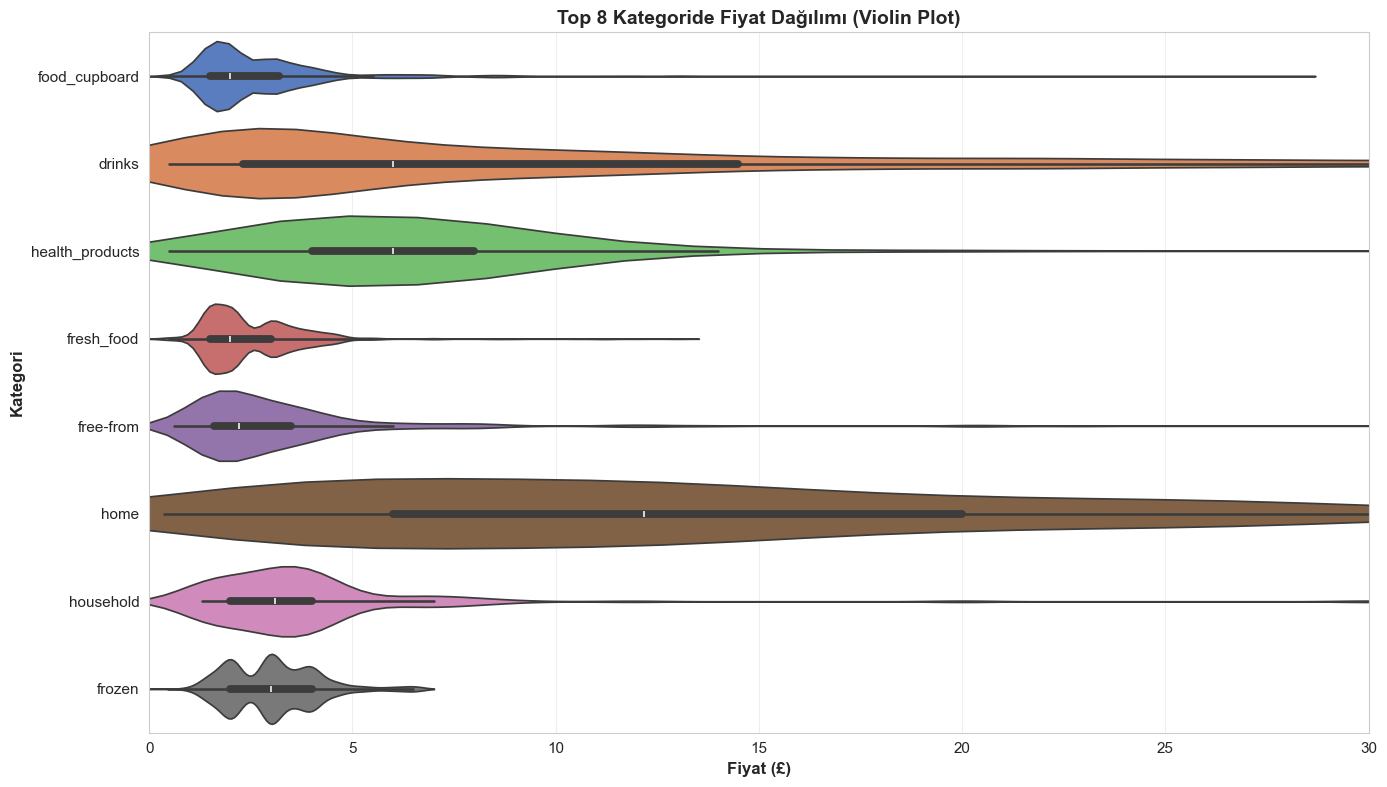

In [18]:
# Grafik 8: Kategori Fiyat Dağılımı (Violin Plot)
fig, ax = plt.subplots(figsize=(14, 8))

# En popüler 8 kategoriyi seç
top_categories = df['category_name'].value_counts().head(8).index
df_top_cat = df[df['category_name'].isin(top_categories)]

sns.violinplot(data=df_top_cat, y='category_name', x='price_gbp', 
               palette='muted', ax=ax, order=top_categories)
ax.set_xlabel('Fiyat (£)', fontweight='bold')
ax.set_ylabel('Kategori', fontweight='bold')
ax.set_title('Top 8 Kategoride Fiyat Dağılımı (Violin Plot)', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')
ax.set_xlim(0, 30)  # Daha iyi görsellik için

plt.tight_layout()
plt.savefig('../outputs/figures/08_category_violin.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 08_category_violin.png')
plt.show()

---
# 🔥 PART 4: HEATMAP ANALİZLERİ
---

## 7. Süpermarket x Kategori Heatmap'leri

💾 Grafik kaydedildi: 09_heatmap_price.png


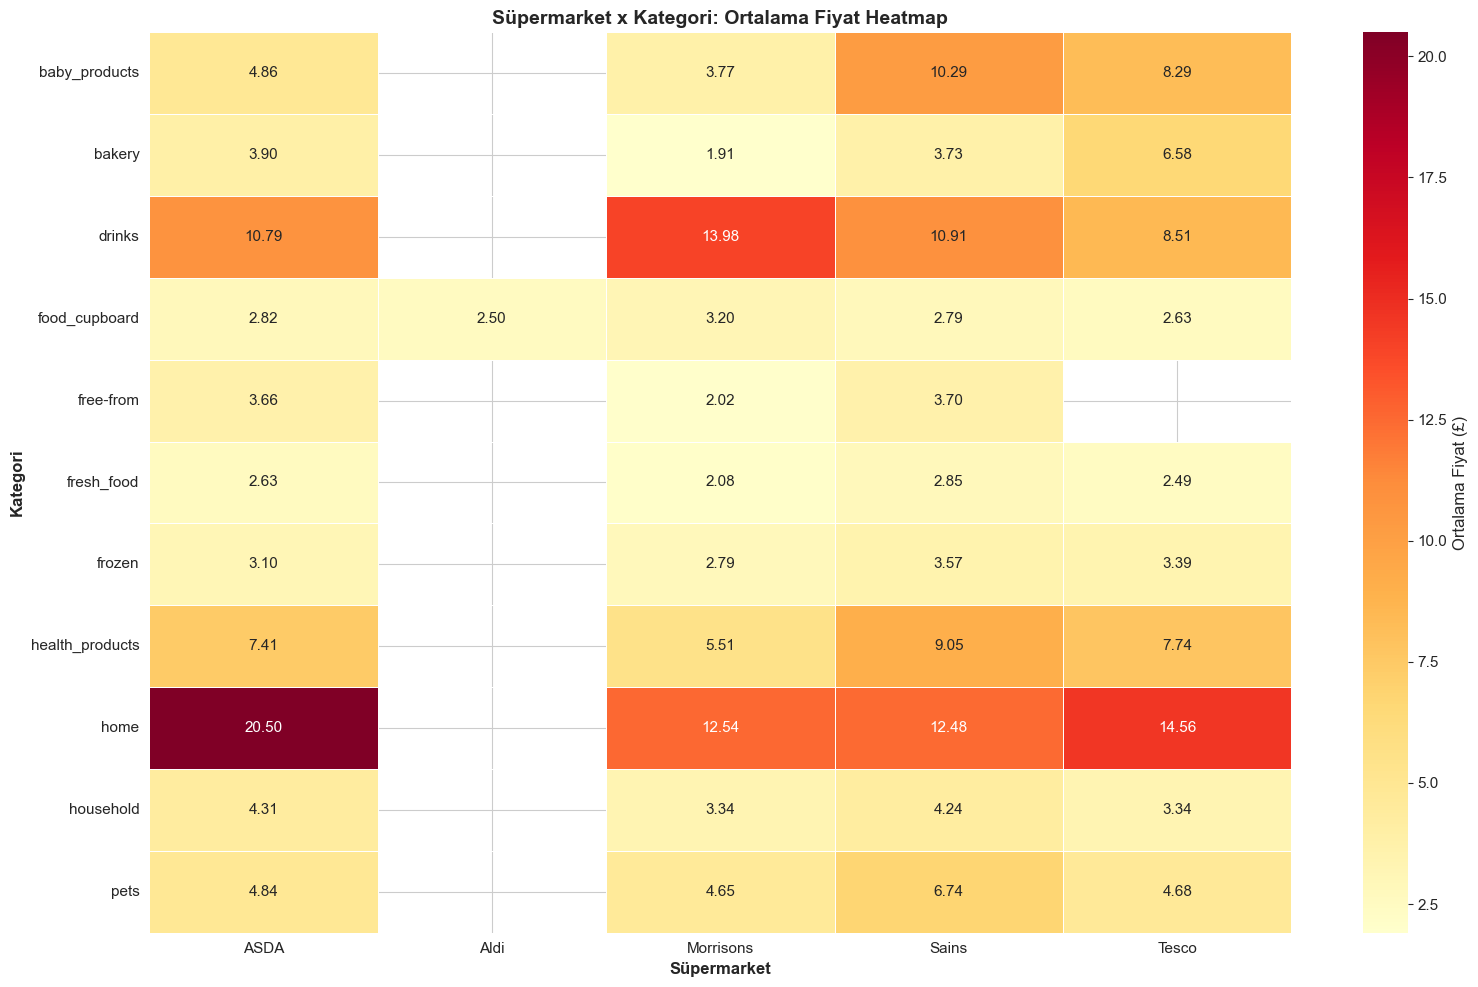

In [19]:
# Grafik 9: Süpermarket x Kategori Ortalama Fiyat Heatmap
fig, ax = plt.subplots(figsize=(16, 10))

# Pivot table oluştur
heatmap_data = df.pivot_table(values='price_gbp', 
                                index='category_name', 
                                columns='supermarket_name', 
                                aggfunc='mean')

# Heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Ortalama Fiyat (£)'}, ax=ax)
ax.set_title('Süpermarket x Kategori: Ortalama Fiyat Heatmap', fontweight='bold', fontsize=14)
ax.set_xlabel('Süpermarket', fontweight='bold')
ax.set_ylabel('Kategori', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/09_heatmap_price.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 09_heatmap_price.png')
plt.show()

💾 Grafik kaydedildi: 10_heatmap_count.png


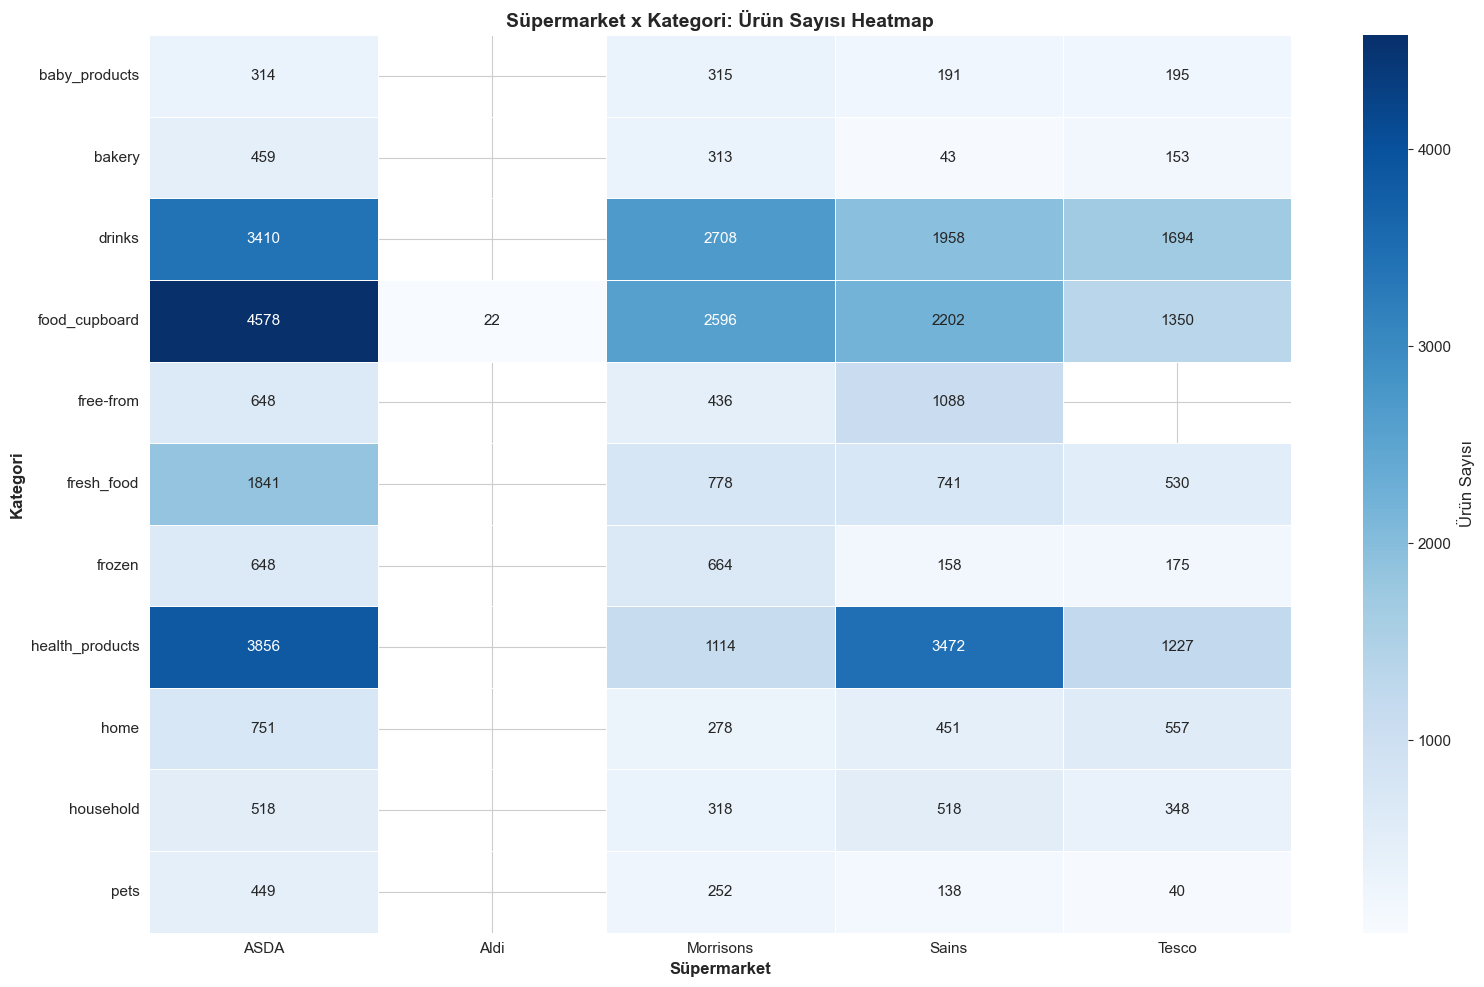

In [20]:
# Grafik 10: Süpermarket x Kategori Ürün Sayısı Heatmap
fig, ax = plt.subplots(figsize=(16, 10))

# Pivot table oluştur
heatmap_count = df.pivot_table(values='price_gbp', 
                                 index='category_name', 
                                 columns='supermarket_name', 
                                 aggfunc='count')

# Heatmap
sns.heatmap(heatmap_count, annot=True, fmt='.0f', cmap='Blues', 
            linewidths=0.5, cbar_kws={'label': 'Ürün Sayısı'}, ax=ax)
ax.set_title('Süpermarket x Kategori: Ürün Sayısı Heatmap', fontweight='bold', fontsize=14)
ax.set_xlabel('Süpermarket', fontweight='bold')
ax.set_ylabel('Kategori', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/10_heatmap_count.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 10_heatmap_count.png')
plt.show()

---
# 📅 PART 5: ZAMAN SERİSİ ANALİZLERİ
---

## 8. Tarih Bazlı Analizler

💾 Grafik kaydedildi: 11_monthly_trend.png


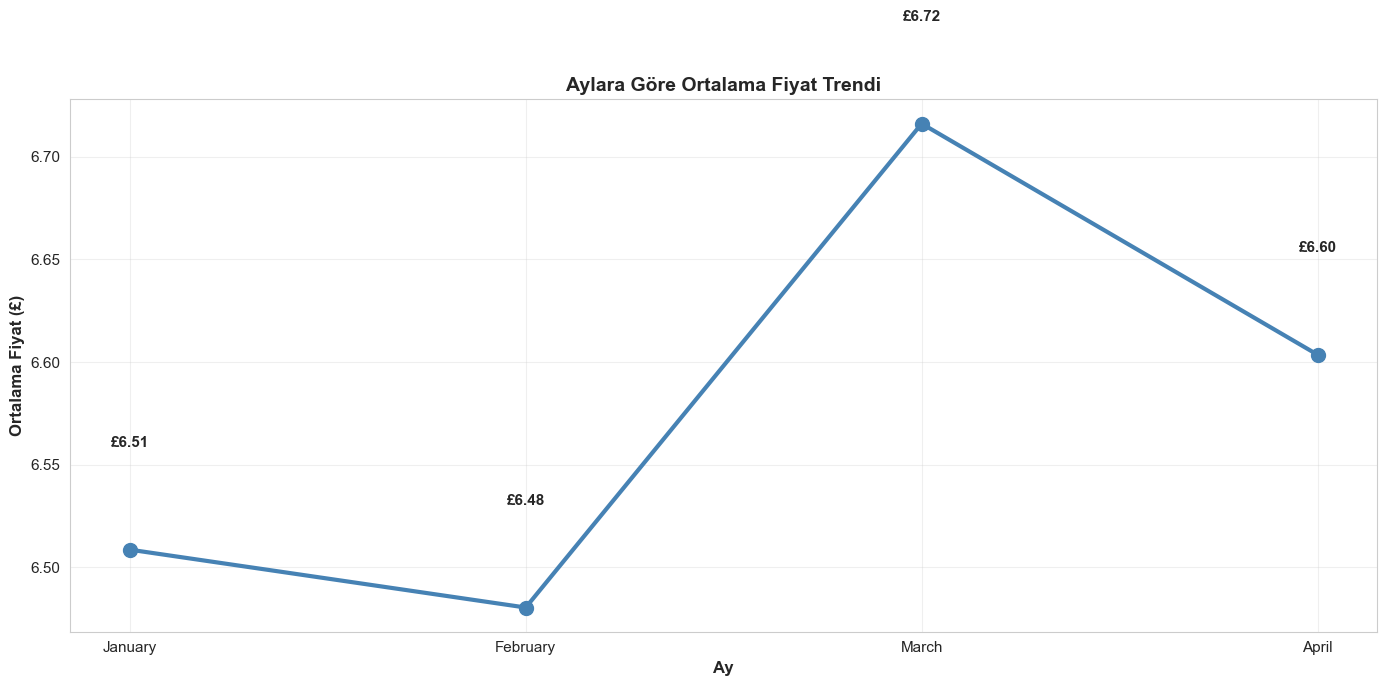

In [21]:
# Grafik 11: Aylara Göre Ortalama Fiyat Trendi
fig, ax = plt.subplots(figsize=(14, 7))

monthly_avg = df.groupby('month_name')['price_gbp'].mean()
month_order = ['January', 'February', 'March', 'April']
monthly_avg = monthly_avg.reindex(month_order)

ax.plot(month_order, monthly_avg.values, marker='o', linewidth=3, markersize=10, color='steelblue')
ax.set_xlabel('Ay', fontweight='bold')
ax.set_ylabel('Ortalama Fiyat (£)', fontweight='bold')
ax.set_title('Aylara Göre Ortalama Fiyat Trendi', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3)

# Değerleri yaz
for i, (month, price) in enumerate(zip(month_order, monthly_avg.values)):
    ax.text(i, price + 0.05, f'£{price:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/11_monthly_trend.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 11_monthly_trend.png')
plt.show()

💾 Grafik kaydedildi: 12_weekend_comparison.png


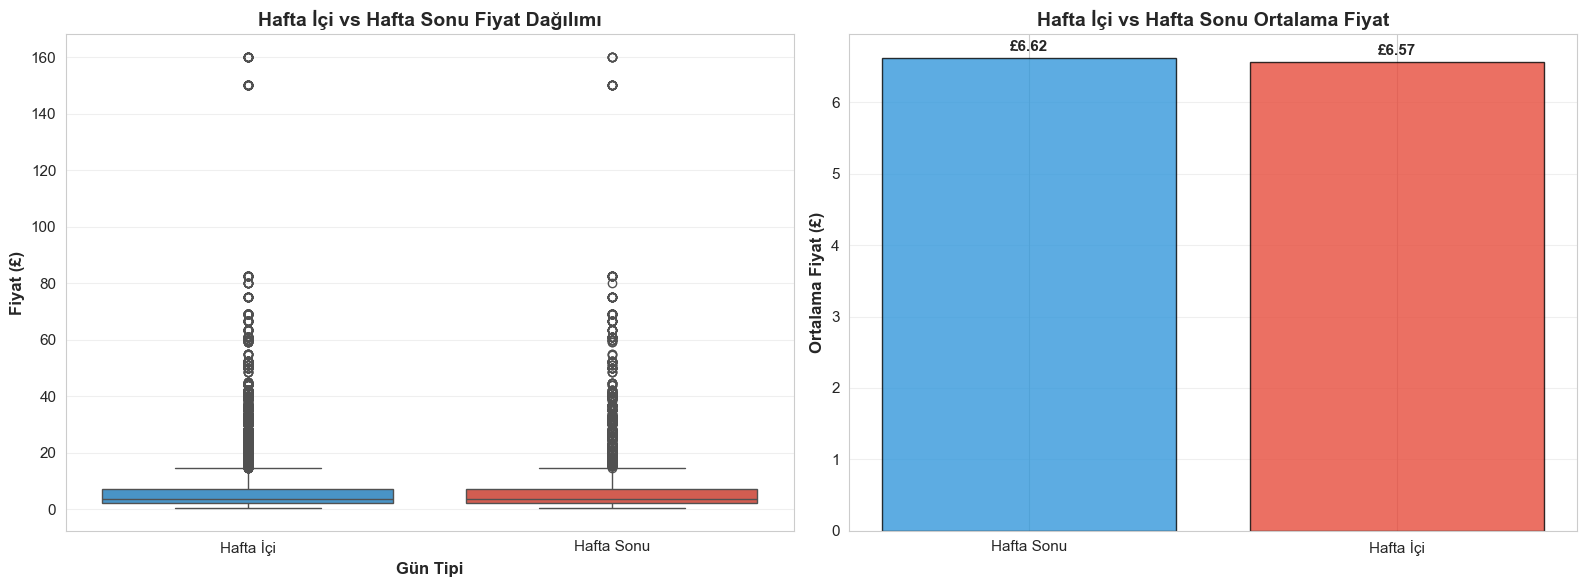

In [22]:
# Grafik 12: Hafta İçi vs Hafta Sonu Fiyat Karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box Plot
weekend_data = df.copy()
weekend_data['is_weekend_label'] = weekend_data['is_weekend'].map({0: 'Hafta İçi', 1: 'Hafta Sonu'})

sns.boxplot(data=weekend_data, x='is_weekend_label', y='price_gbp', 
            palette=['#3498db', '#e74c3c'], ax=axes[0])
axes[0].set_xlabel('Gün Tipi', fontweight='bold')
axes[0].set_ylabel('Fiyat (£)', fontweight='bold')
axes[0].set_title('Hafta İçi vs Hafta Sonu Fiyat Dağılımı', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Bar Chart - Ortalama
weekend_avg = weekend_data.groupby('is_weekend_label')['price_gbp'].mean()
colors_weekend = ['#3498db', '#e74c3c']
axes[1].bar(weekend_avg.index, weekend_avg.values, color=colors_weekend, edgecolor='black', alpha=0.8)
axes[1].set_ylabel('Ortalama Fiyat (£)', fontweight='bold')
axes[1].set_title('Hafta İçi vs Hafta Sonu Ortalama Fiyat', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Değerler
for i, v in enumerate(weekend_avg.values):
    axes[1].text(i, v + 0.1, f'£{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/12_weekend_comparison.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 12_weekend_comparison.png')
plt.show()

💾 Grafik kaydedildi: 13_daily_activity.png


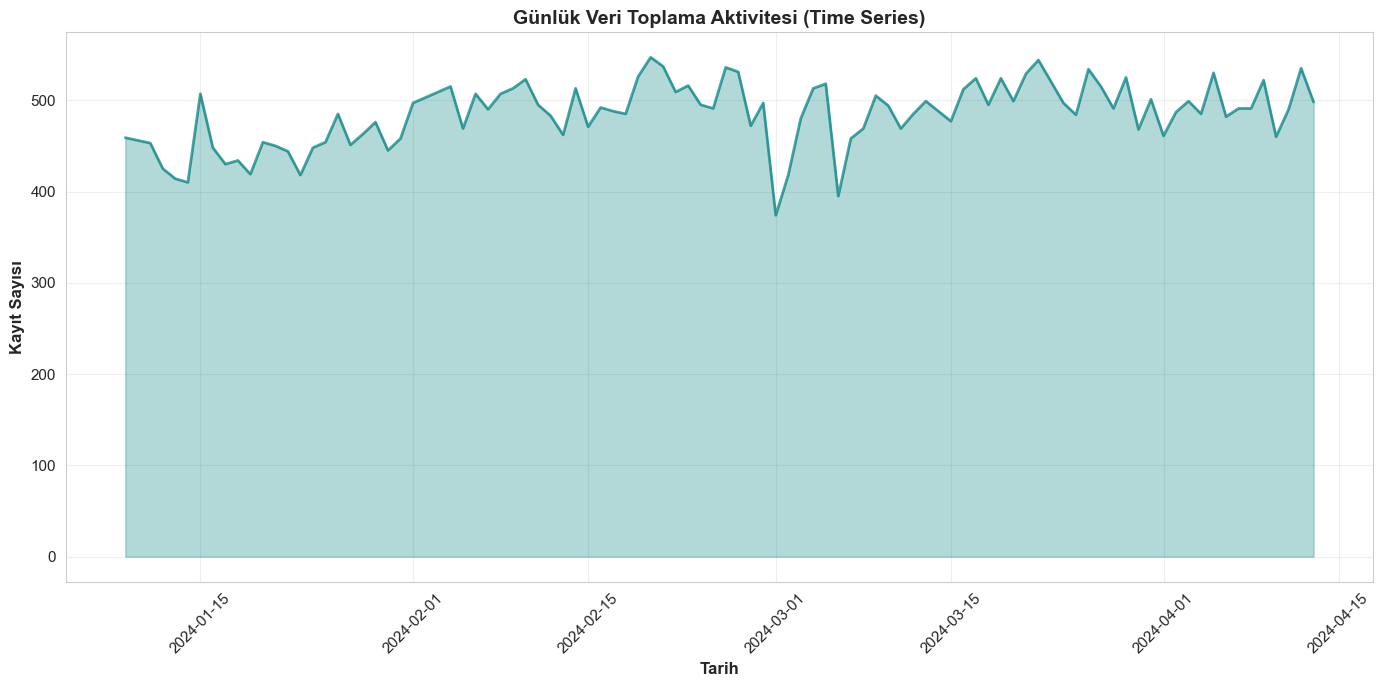

In [23]:
# Grafik 13: Günlük Veri Toplama Aktivitesi
fig, ax = plt.subplots(figsize=(14, 7))

daily_counts = df.groupby('capture_date').size()
ax.plot(daily_counts.index, daily_counts.values, linewidth=2, color='teal', alpha=0.7)
ax.fill_between(daily_counts.index, daily_counts.values, alpha=0.3, color='teal')
ax.set_xlabel('Tarih', fontweight='bold')
ax.set_ylabel('Kayıt Sayısı', fontweight='bold')
ax.set_title('Günlük Veri Toplama Aktivitesi (Time Series)', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/figures/13_daily_activity.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 13_daily_activity.png')
plt.show()

---
# 📏 PART 6: BİRİM ANALİZLERİ
---

## 9. Birim Bazlı Analizler

💾 Grafik kaydedildi: 14_unit_distribution.png


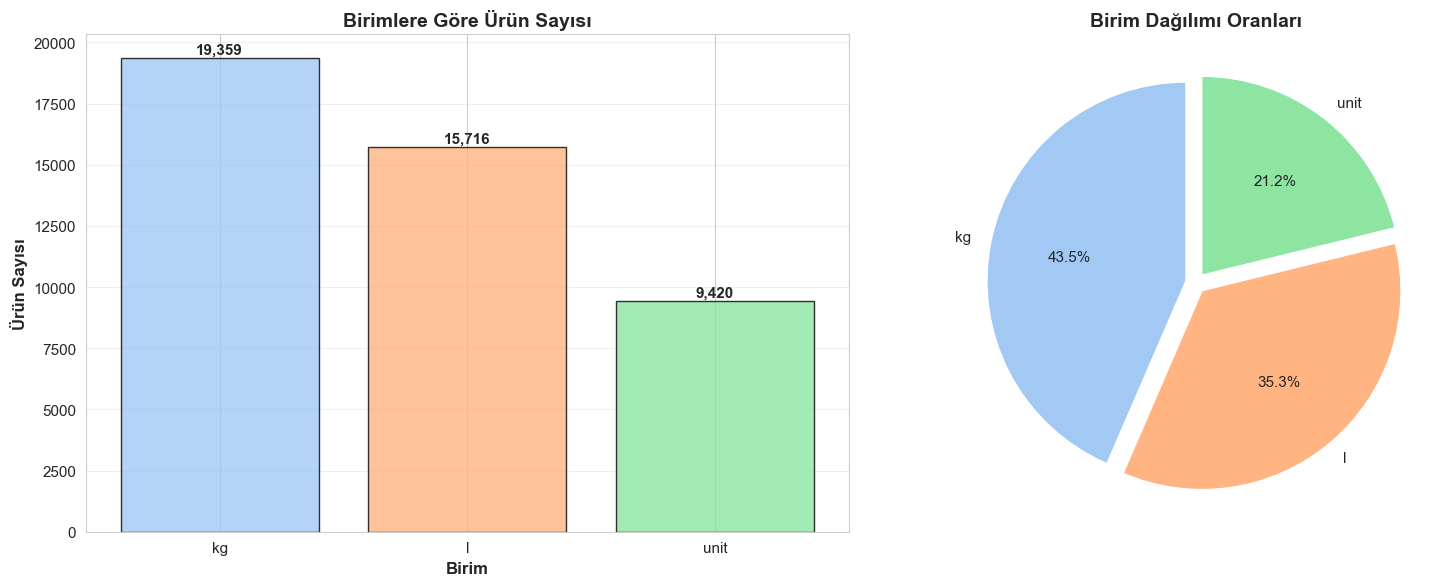

In [24]:
# Grafik 14: Birimlere Göre Ürün Dağılımı
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

unit_counts = df['unit'].value_counts()
colors_unit = sns.color_palette('pastel', len(unit_counts))

# Bar Chart
axes[0].bar(unit_counts.index, unit_counts.values, color=colors_unit, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Birim', fontweight='bold')
axes[0].set_ylabel('Ürün Sayısı', fontweight='bold')
axes[0].set_title('Birimlere Göre Ürün Sayısı', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Değerler
for i, v in enumerate(unit_counts.values):
    axes[0].text(i, v + 200, f'{v:,}', ha='center', fontweight='bold')

# Pie Chart
axes[1].pie(unit_counts.values, labels=unit_counts.index, autopct='%1.1f%%', 
            colors=colors_unit, startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Birim Dağılımı Oranları', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/14_unit_distribution.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 14_unit_distribution.png')
plt.show()

💾 Grafik kaydedildi: 15_unit_price_comparison.png


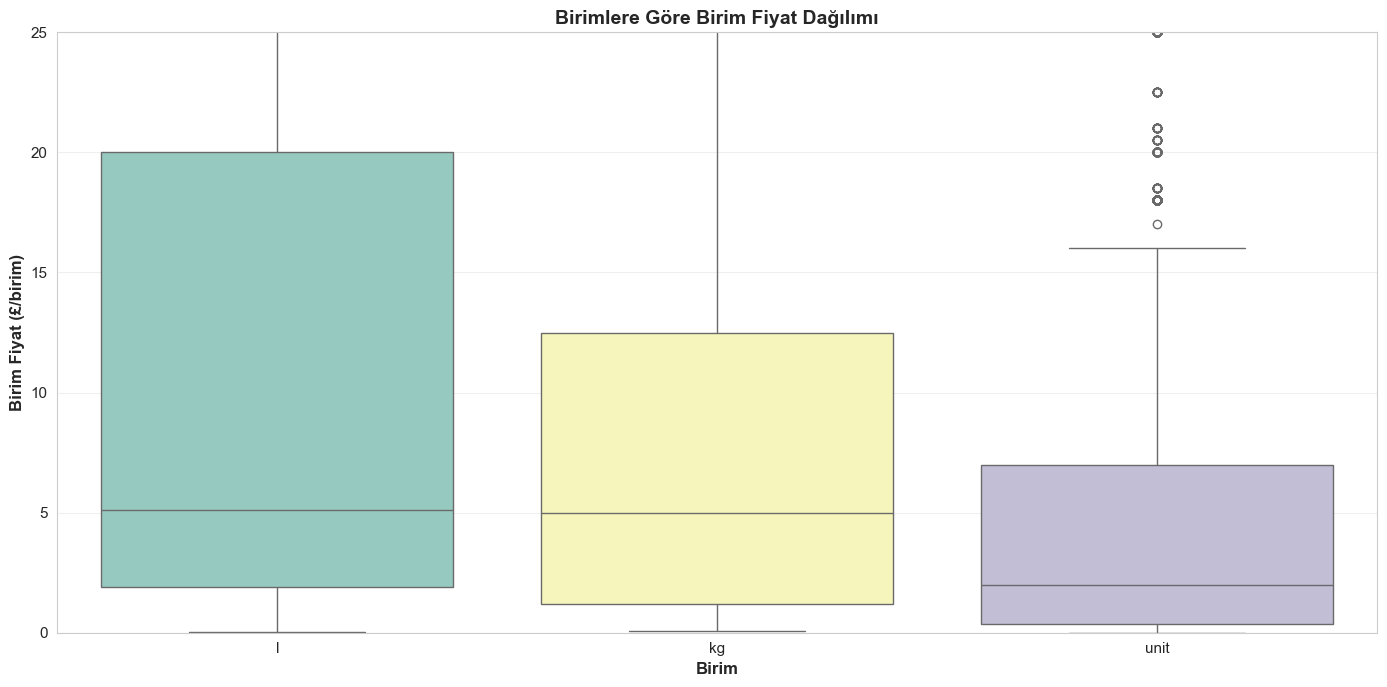

In [25]:
# Grafik 15: Birimlere Göre Birim Fiyat Karşılaştırması
fig, ax = plt.subplots(figsize=(14, 7))

sns.boxplot(data=df, x='unit', y='price_unit_gbp', palette='Set3', ax=ax)
ax.set_xlabel('Birim', fontweight='bold')
ax.set_ylabel('Birim Fiyat (£/birim)', fontweight='bold')
ax.set_title('Birimlere Göre Birim Fiyat Dağılımı', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 25)  # Daha iyi görsellik

plt.tight_layout()
plt.savefig('../outputs/figures/15_unit_price_comparison.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 15_unit_price_comparison.png')
plt.show()

---
# 🔝 PART 7: TOP ÜRÜN ANALİZLERİ
---

## 10. En Pahalı ve En Ucuz Ürünler

💾 Grafik kaydedildi: 16_top_expensive.png


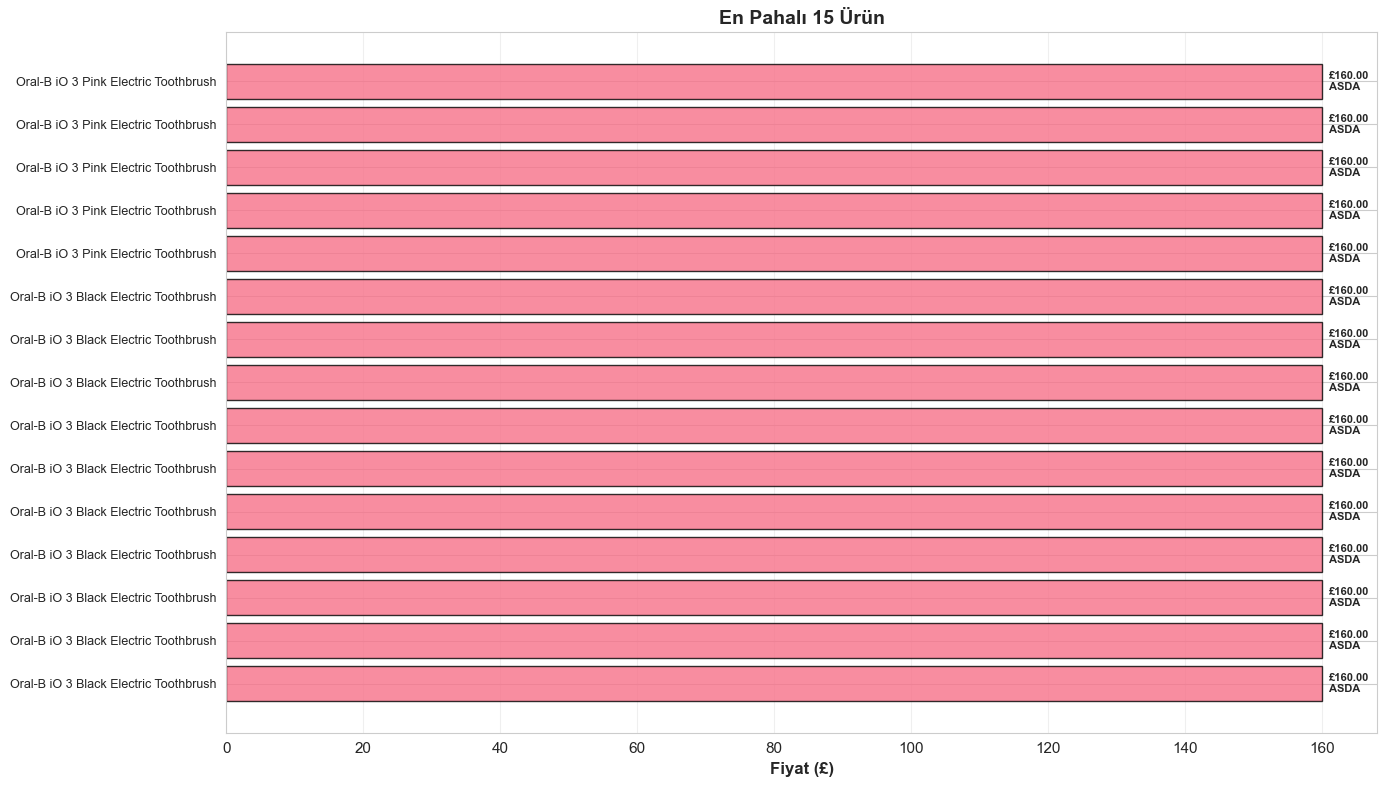

In [26]:
# Grafik 16: En Pahalı 15 Ürün
fig, ax = plt.subplots(figsize=(14, 8))

top_expensive = df.nlargest(15, 'price_gbp')[['product_name', 'price_gbp', 'supermarket_name']].sort_values('price_gbp')

# Farklı marketler için farklı renkler
supermarkets = top_expensive['supermarket_name'].unique()
color_map = {sm: color for sm, color in zip(supermarkets, sns.color_palette('husl', len(supermarkets)))}
colors_exp = [color_map[sm] for sm in top_expensive['supermarket_name']]

bars = ax.barh(range(len(top_expensive)), top_expensive['price_gbp'].values, 
               color=colors_exp, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_expensive)))
ax.set_yticklabels([name[:40] + '...' if len(name) > 40 else name for name in top_expensive['product_name']], fontsize=9)
ax.set_xlabel('Fiyat (£)', fontweight='bold')
ax.set_title('En Pahalı 15 Ürün', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Fiyatları yaz
for i, (idx, row) in enumerate(top_expensive.iterrows()):
    ax.text(row['price_gbp'] + 1, i, f"£{row['price_gbp']:.2f}\n{row['supermarket_name']}", 
            va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/16_top_expensive.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 16_top_expensive.png')
plt.show()

💾 Grafik kaydedildi: 17_top_cheap.png


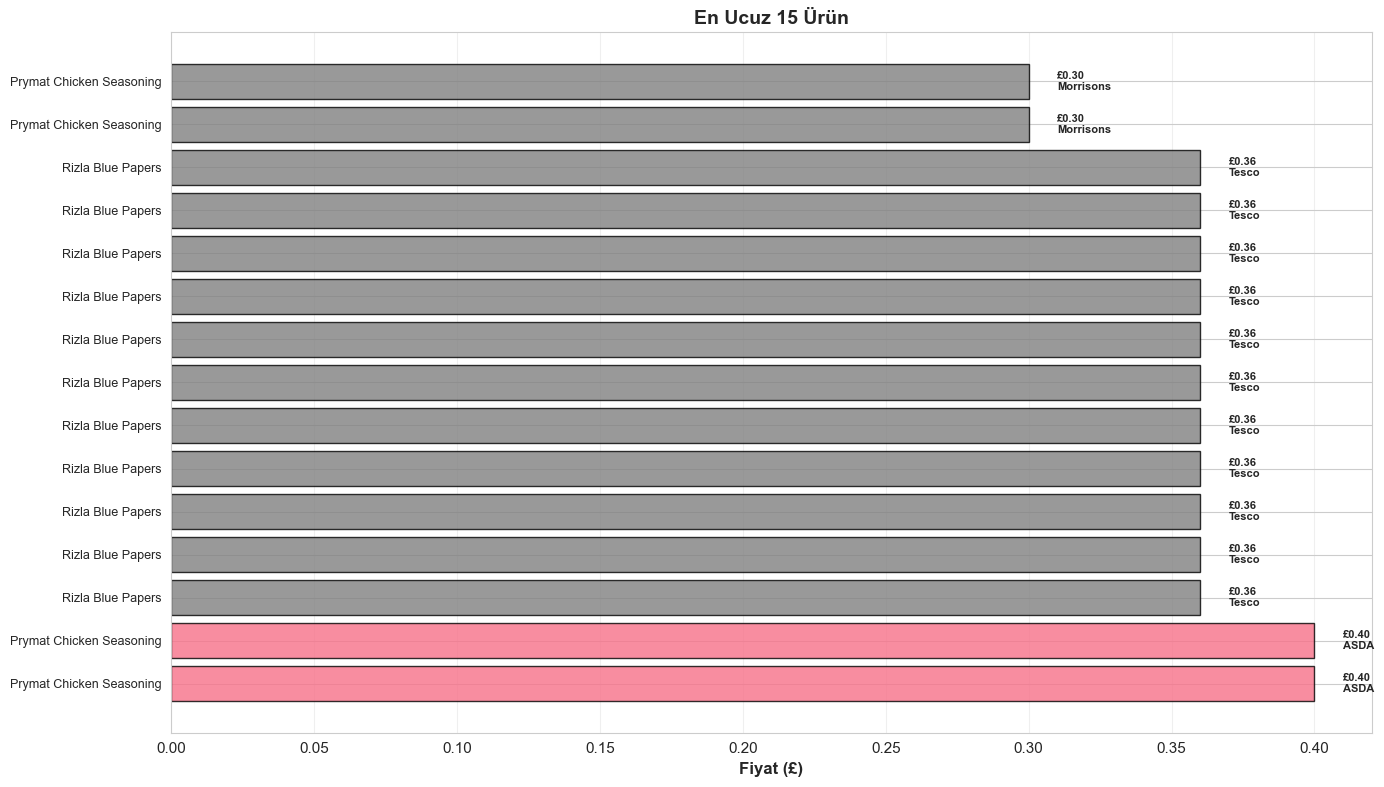

In [27]:
# Grafik 17: En Ucuz 15 Ürün
fig, ax = plt.subplots(figsize=(14, 8))

top_cheap = df.nsmallest(15, 'price_gbp')[['product_name', 'price_gbp', 'supermarket_name']].sort_values('price_gbp', ascending=False)

colors_cheap = [color_map.get(sm, 'gray') for sm in top_cheap['supermarket_name']]

bars = ax.barh(range(len(top_cheap)), top_cheap['price_gbp'].values, 
               color=colors_cheap, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_cheap)))
ax.set_yticklabels([name[:40] + '...' if len(name) > 40 else name for name in top_cheap['product_name']], fontsize=9)
ax.set_xlabel('Fiyat (£)', fontweight='bold')
ax.set_title('En Ucuz 15 Ürün', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Fiyatları yaz
for i, (idx, row) in enumerate(top_cheap.iterrows()):
    ax.text(row['price_gbp'] + 0.01, i, f"£{row['price_gbp']:.2f}\n{row['supermarket_name']}", 
            va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/17_top_cheap.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 17_top_cheap.png')
plt.show()

---
# 🎯 PART 8: İLERİ SEVİYE ANALİZLER
---

## 11. Korelasyon Analizi

💾 Grafik kaydedildi: 18_correlation_matrix.png


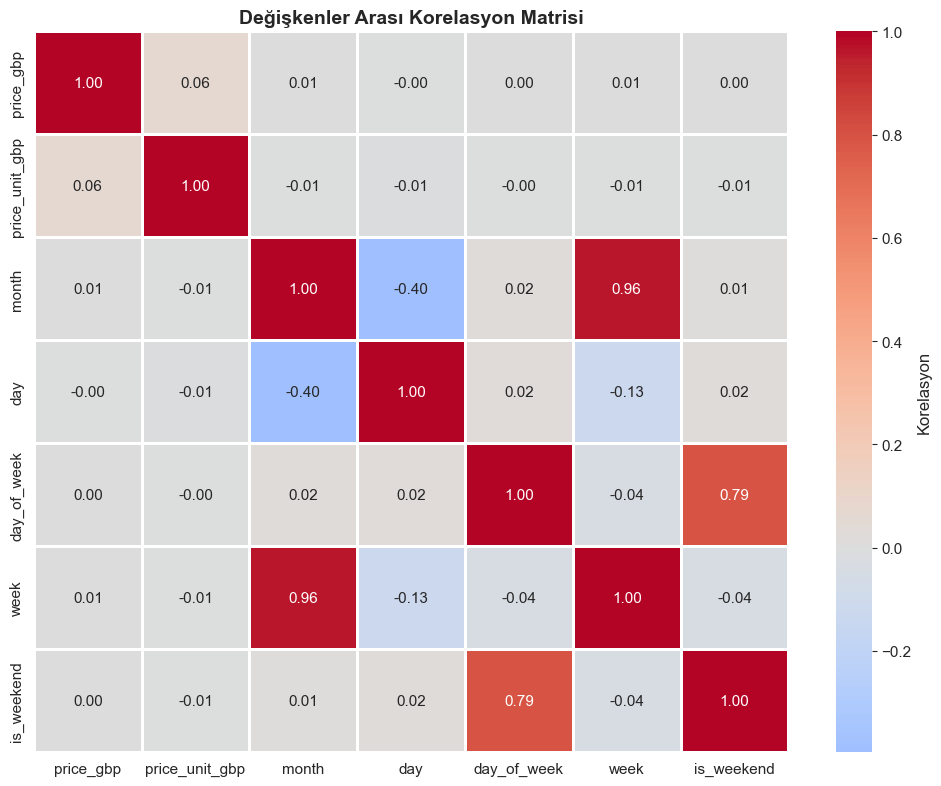

In [28]:
# Grafik 18: Korelasyon Matrisi
fig, ax = plt.subplots(figsize=(10, 8))

# Sayısal sütunları seç
numeric_cols = ['price_gbp', 'price_unit_gbp', 'month', 'day', 'day_of_week', 'week', 'is_weekend']
correlation_matrix = df[numeric_cols].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=1, cbar_kws={'label': 'Korelasyon'}, ax=ax)
ax.set_title('Değişkenler Arası Korelasyon Matrisi', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('../outputs/figures/18_correlation_matrix.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 18_correlation_matrix.png')
plt.show()

💾 Grafik kaydedildi: 19_price_vs_unit_price.png


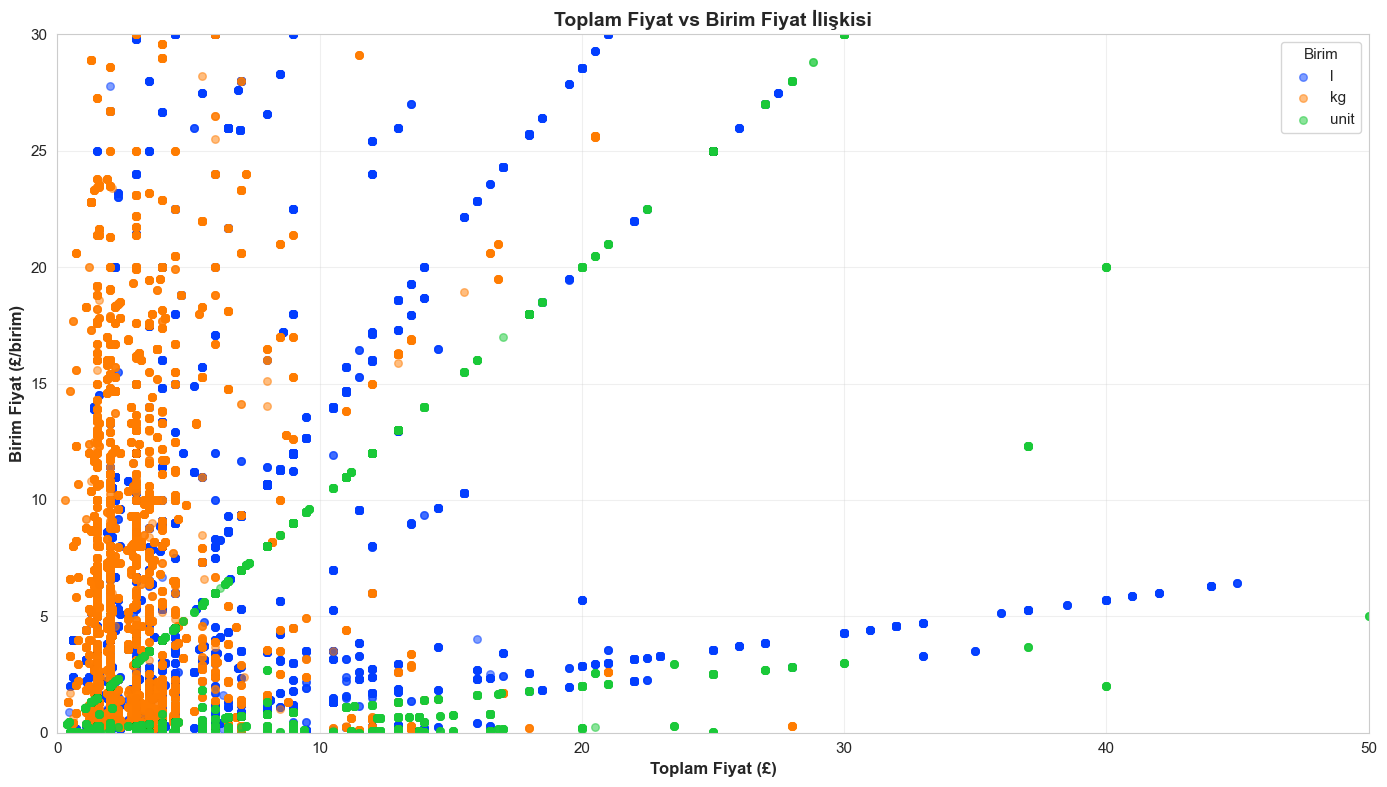

In [29]:
# Grafik 19: Fiyat vs Birim Fiyat Scatter Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Her birim için farklı renk
units = df['unit'].unique()
unit_colors = {unit: color for unit, color in zip(units, sns.color_palette('bright', len(units)))}

for unit in units:
    unit_data = df[df['unit'] == unit]
    ax.scatter(unit_data['price_gbp'], unit_data['price_unit_gbp'], 
              label=unit, alpha=0.5, s=30, color=unit_colors[unit])

ax.set_xlabel('Toplam Fiyat (£)', fontweight='bold')
ax.set_ylabel('Birim Fiyat (£/birim)', fontweight='bold')
ax.set_title('Toplam Fiyat vs Birim Fiyat İlişkisi', fontweight='bold', fontsize=14)
ax.legend(title='Birim', loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 50)
ax.set_ylim(0, 30)

plt.tight_layout()
plt.savefig('../outputs/figures/19_price_vs_unit_price.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 19_price_vs_unit_price.png')
plt.show()

💾 Grafik kaydedildi: 20_category_supermarket_comparison.png


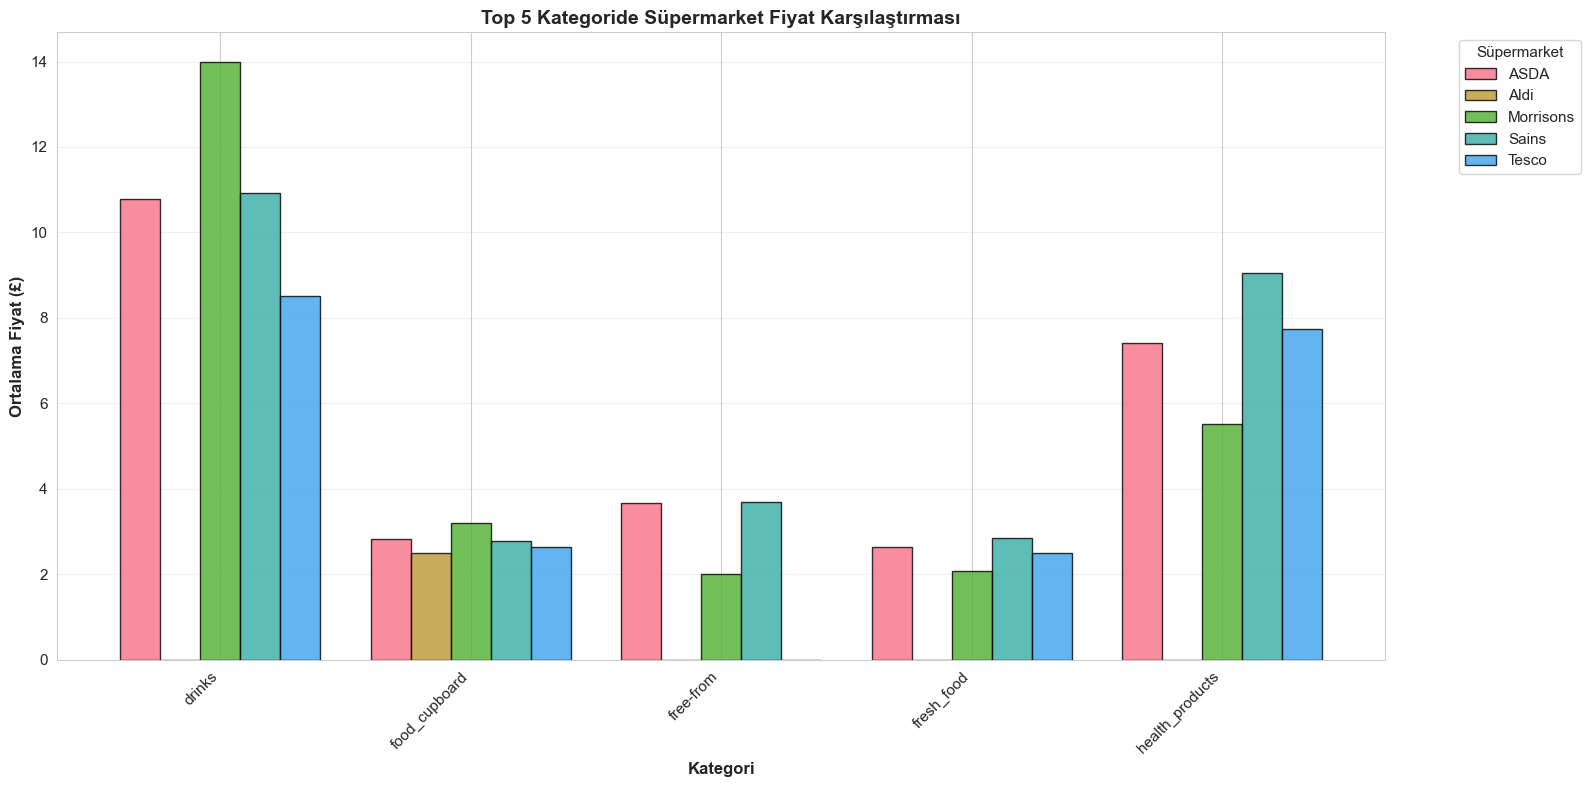

In [30]:
# Grafik 20: Kategori x Süpermarket Fiyat Karşılaştırması (Top 5 Kategori)
fig, ax = plt.subplots(figsize=(16, 8))

# En popüler 5 kategori
top_5_categories = df['category_name'].value_counts().head(5).index
df_top5 = df[df['category_name'].isin(top_5_categories)]

# Grouped bar chart
category_market_avg = df_top5.pivot_table(values='price_gbp', 
                                           index='category_name', 
                                           columns='supermarket_name', 
                                           aggfunc='mean')

category_market_avg.plot(kind='bar', ax=ax, width=0.8, edgecolor='black', alpha=0.8)
ax.set_xlabel('Kategori', fontweight='bold')
ax.set_ylabel('Ortalama Fiyat (£)', fontweight='bold')
ax.set_title('Top 5 Kategoride Süpermarket Fiyat Karşılaştırması', fontweight='bold', fontsize=14)
ax.legend(title='Süpermarket', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../outputs/figures/20_category_supermarket_comparison.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 20_category_supermarket_comparison.png')
plt.show()

---
# 📊 PART 9: ÖZETÖstatistikler
---

## 12. Final İstatistikler ve Özet

In [31]:
# Final İstatistik Raporu
print('='*70)
print('📊 KEŞIFSEL VERİ ANALİZİ - ÖZET RAPOR')
print('='*70)

print(f'\n1️⃣ VERİ SETİ BİLGİLERİ:')
print(f'   • Toplam kayıt: {len(df):,}')
print(f'   • Tarih aralığı: {df["capture_date"].min().strftime("%d/%m/%Y")} - {df["capture_date"].max().strftime("%d/%m/%Y")}')
print(f'   • Gün sayısı: {(df["capture_date"].max() - df["capture_date"].min()).days} gün')
print(f'   • Benzersiz ürün: {df["product_name"].nunique():,}')

print(f'\n2️⃣ SÜPERMARKET İSTATİSTİKLERİ:')
print(f'   • Toplam süpermarket: {df["supermarket_name"].nunique()}')
print(f'   • En fazla ürün: {df["supermarket_name"].value_counts().index[0]} ({df["supermarket_name"].value_counts().values[0]:,} ürün)')
print(f'   • En ucuz ortalama: {df.groupby("supermarket_name")["price_gbp"].mean().idxmin()} (£{df.groupby("supermarket_name")["price_gbp"].mean().min():.2f})')
print(f'   • En pahalı ortalama: {df.groupby("supermarket_name")["price_gbp"].mean().idxmax()} (£{df.groupby("supermarket_name")["price_gbp"].mean().max():.2f})')

print(f'\n3️⃣ KATEGORİ İSTATİSTİKLERİ:')
print(f'   • Toplam kategori: {df["category_name"].nunique()}')
print(f'   • En popüler: {df["category_name"].value_counts().index[0]} ({df["category_name"].value_counts().values[0]:,} ürün)')
print(f'   • En pahalı ortalama: {df.groupby("category_name")["price_gbp"].mean().idxmax()} (£{df.groupby("category_name")["price_gbp"].mean().max():.2f})')
print(f'   • En ucuz ortalama: {df.groupby("category_name")["price_gbp"].mean().idxmin()} (£{df.groupby("category_name")["price_gbp"].mean().min():.2f})')

print(f'\n4️⃣ FİYAT İSTATİSTİKLERİ:')
print(f'   • Minimum fiyat: £{df["price_gbp"].min():.2f}')
print(f'   • Maksimum fiyat: £{df["price_gbp"].max():.2f}')
print(f'   • Ortalama fiyat: £{df["price_gbp"].mean():.2f}')
print(f'   • Medyan fiyat: £{df["price_gbp"].median():.2f}')
print(f'   • Standart sapma: £{df["price_gbp"].std():.2f}')

print(f'\n5️⃣ FİYAT KATEGORİSİ DAĞILIMI:')
for cat in df['price_category'].value_counts().index:
    count = df['price_category'].value_counts()[cat]
    pct = count / len(df) * 100
    print(f'   • {cat}: {count:,} ürün ({pct:.1f}%)')

print(f'\n6️⃣ BİRİM DAĞILIMI:')
for unit in df['unit'].value_counts().index:
    count = df['unit'].value_counts()[unit]
    pct = count / len(df) * 100
    print(f'   • {unit}: {count:,} ürün ({pct:.1f}%)')

print(f'\n7️⃣ ZAMAN ANALİZİ:')
print(f'   • Hafta içi kayıt: {(df["is_weekend"] == 0).sum():,} ({(df["is_weekend"] == 0).sum()/len(df)*100:.1f}%)')
print(f'   • Hafta sonu kayıt: {(df["is_weekend"] == 1).sum():,} ({(df["is_weekend"] == 1).sum()/len(df)*100:.1f}%)')

print('\n' + '='*70)
print('✅ EDA TAMAMLANDI - 20 GRAFİK OLUŞTURULDU!')
print('='*70)

📊 KEŞIFSEL VERİ ANALİZİ - ÖZET RAPOR

1️⃣ VERİ SETİ BİLGİLERİ:
   • Toplam kayıt: 44,495
   • Tarih aralığı: 09/01/2024 - 13/04/2024
   • Gün sayısı: 95 gün
   • Benzersiz ürün: 1,579

2️⃣ SÜPERMARKET İSTATİSTİKLERİ:
   • Toplam süpermarket: 5
   • En fazla ürün: ASDA (17,472 ürün)
   • En ucuz ortalama: Aldi (£2.50)
   • En pahalı ortalama: Sains (£6.98)

3️⃣ KATEGORİ İSTATİSTİKLERİ:
   • Toplam kategori: 11
   • En popüler: food_cupboard (10,748 ürün)
   • En pahalı ortalama: home (£16.01)
   • En ucuz ortalama: fresh_food (£2.54)

4️⃣ FİYAT İSTATİSTİKLERİ:
   • Minimum fiyat: £0.30
   • Maksimum fiyat: £160.00
   • Ortalama fiyat: £6.58
   • Medyan fiyat: £3.50
   • Standart sapma: £10.19

5️⃣ FİYAT KATEGORİSİ DAĞILIMI:
   • Orta: 15,309 ürün (34.4%)
   • Ucuz: 14,901 ürün (33.5%)
   • Pahalı: 14,285 ürün (32.1%)

6️⃣ BİRİM DAĞILIMI:
   • kg: 19,359 ürün (43.5%)
   • l: 15,716 ürün (35.3%)
   • unit: 9,420 ürün (21.2%)

7️⃣ ZAMAN ANALİZİ:
   • Hafta içi kayıt: 32,491 (73.0%)
   • Ha

---

## ✅ KEŞİFSEL VERİ ANALİZİ TAMAMLANDI!

**Oluşturulan Grafikler (20 adet):**

### Fiyat Analizleri:
1. ✅ Fiyat Dağılımı (Histogram + KDE)
2. ✅ Fiyat Kategorisi Dağılımı

### Süpermarket Analizleri:
3. ✅ Süpermarket Ürün Sayıları
4. ✅ Süpermarket Ortalama Fiyat Karşılaştırması
5. ✅ Süpermarket Fiyat Kategorisi Dağılımı

### Kategori Analizleri:
6. ✅ Kategori Ürün Sayıları
7. ✅ Kategori Ortalama Fiyatları
8. ✅ Kategori Fiyat Dağılımı (Violin Plot)

### Heatmap Analizleri:
9. ✅ Süpermarket x Kategori Ortalama Fiyat Heatmap
10. ✅ Süpermarket x Kategori Ürün Sayısı Heatmap

### Zaman Serisi Analizleri:
11. ✅ Aylara Göre Fiyat Trendi
12. ✅ Hafta İçi vs Hafta Sonu Karşılaştırması
13. ✅ Günlük Veri Toplama Aktivitesi

### Birim Analizleri:
14. ✅ Birim Dağılımı
15. ✅ Birim Fiyat Karşılaştırması

### Top Ürün Analizleri:
16. ✅ En Pahalı 15 Ürün
17. ✅ En Ucuz 15 Ürün

### İleri Seviye Analizler:
18. ✅ Korelasyon Matrisi
19. ✅ Fiyat vs Birim Fiyat İlişkisi
20. ✅ Kategori x Süpermarket Karşılaştırması

**Sonraki Adım:**
`03_linear_regression.ipynb` - Fiyat Tahmin Modeli

## 1. Kütüphaneleri Yükle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
sns.set_palette('husl')

print('✅ Kütüphaneler yüklendi!')

✅ Kütüphaneler yüklendi!


## 2. Temizlenmiş Veriyi Yükle

In [2]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df['tarih'] = pd.to_datetime(df['tarih'])

print(f'Veri boyutu: {df.shape}')
print(f'Tarih aralığı: {df["tarih"].min()} - {df["tarih"].max()}')
df.head()

Veri boyutu: (10000, 12)
Tarih aralığı: 2024-11-09 00:00:00 - 2025-11-09 00:00:00


,urun_adi,fiyat,kategori,market_adi,tarih,marka,yil,ay,ay_adi,gun,haftanin_gunu,gun_adi
0,Diş Macunu,60.60,Kişisel Bakım,A101,2024-12-25,Gillette,2024,12,December,25,2,Wednesday
1,Mama,247.18,Bebek Ürünleri,CarrefourSA,2025-07-20,Prima,2025,7,July,20,6,Sunday
2,Soda,15.88,İçecek,A101,2025-07-30,Jacobs,2025,7,July,30,2,Wednesday
3,Ayran,11.46,Süt & Süt Ürünleri,A101,2025-08-23,Sütaş,2025,8,August,23,5,Saturday
4,Pizza,122.27,Donmuş Gıdalar,BİM,2025-10-27,Pınar,2025,10,October,27,0,Monday


## 3. Temel İstatistikler

In [3]:
print('='*60)
print('TEMEL İSTATİSTİKLER')
print('='*60)

print(f"\n📊 Toplam Ürün Çeşidi: {df['urun_adi'].nunique()}")
print(f"🏪 Market Sayısı: {df['market_adi'].nunique()}")
print(f"📦 Kategori Sayısı: {df['kategori'].nunique()}")
print(f"🏷️ Marka Sayısı: {df['marka'].nunique()}")

print(f"\n💰 Ortalama Fiyat: {df['fiyat'].mean():.2f} TL")
print(f"💰 Medyan Fiyat: {df['fiyat'].median():.2f} TL")
print(f"💰 En Düşük Fiyat: {df['fiyat'].min():.2f} TL")
print(f"💰 En Yüksek Fiyat: {df['fiyat'].max():.2f} TL")

TEMEL İSTATİSTİKLER

📊 Toplam Ürün Çeşidi: 86
🏪 Market Sayısı: 5
📦 Kategori Sayısı: 16
🏷️ Marka Sayısı: 70

💰 Ortalama Fiyat: 75.07 TL
💰 Medyan Fiyat: 54.86 TL
💰 En Düşük Fiyat: 8.11 TL
💰 En Yüksek Fiyat: 399.50 TL


## 4. MATPLOTLIB GÖRSELLEŞTİRMELERİ

### 4.1 Fiyat Dağılımı (Histogram)

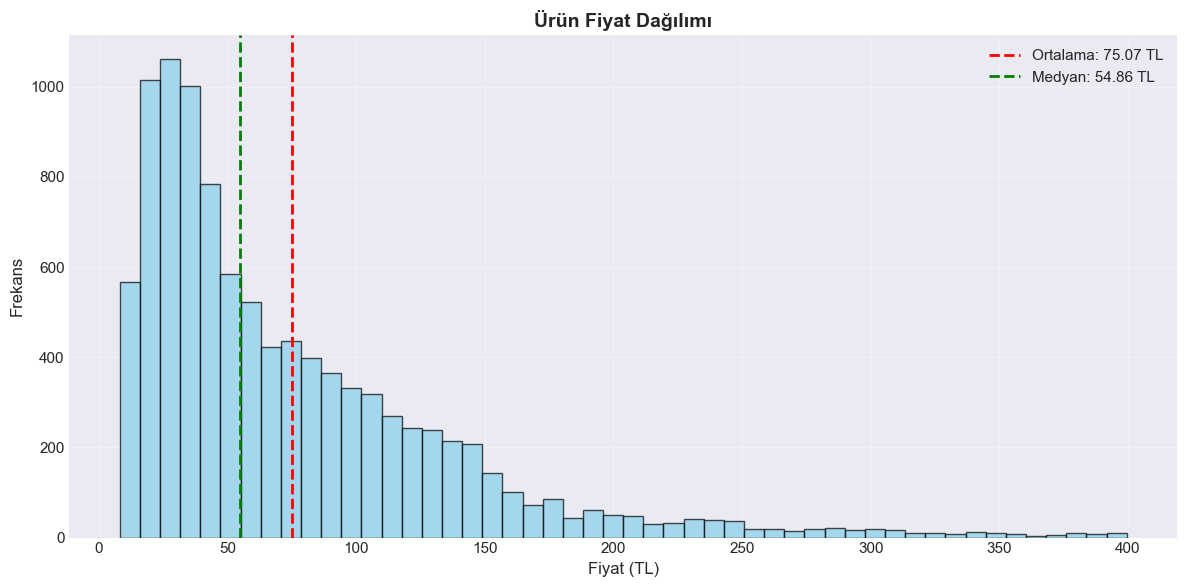

✅ Grafik kaydedildi: 02_fiyat_dagilimi.png


In [4]:
plt.figure(figsize=(12, 6))
plt.hist(df['fiyat'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['fiyat'].mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: {df["fiyat"].mean():.2f} TL')
plt.axvline(df['fiyat'].median(), color='green', linestyle='--', linewidth=2, label=f'Medyan: {df["fiyat"].median():.2f} TL')
plt.xlabel('Fiyat (TL)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.title('Ürün Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/02_fiyat_dagilimi.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 02_fiyat_dagilimi.png')

### 4.2 Market Bazında Ortalama Fiyatlar (Bar Chart)

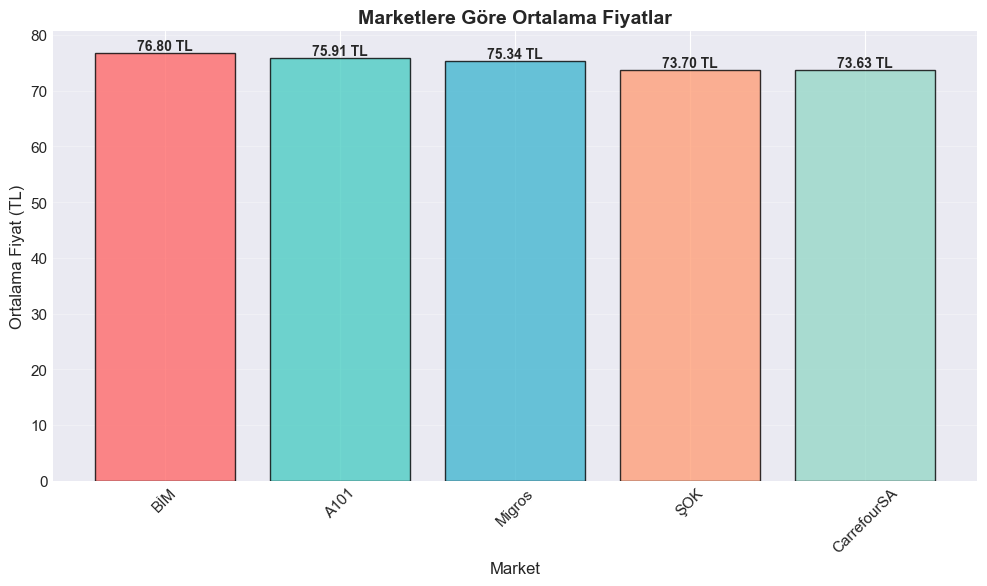

✅ Grafik kaydedildi: 03_market_ortalama.png


In [5]:
market_avg = df.groupby('market_adi')['fiyat'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bars = plt.bar(market_avg.index, market_avg.values, color=colors, edgecolor='black', alpha=0.8)

# Değerleri bar'ların üstüne yaz
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} TL',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Market', fontsize=12)
plt.ylabel('Ortalama Fiyat (TL)', fontsize=12)
plt.title('Marketlere Göre Ortalama Fiyatlar', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/03_market_ortalama.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 03_market_ortalama.png')

### 4.3 Kategori Bazında Ortalama Fiyatlar (Horizontal Bar)

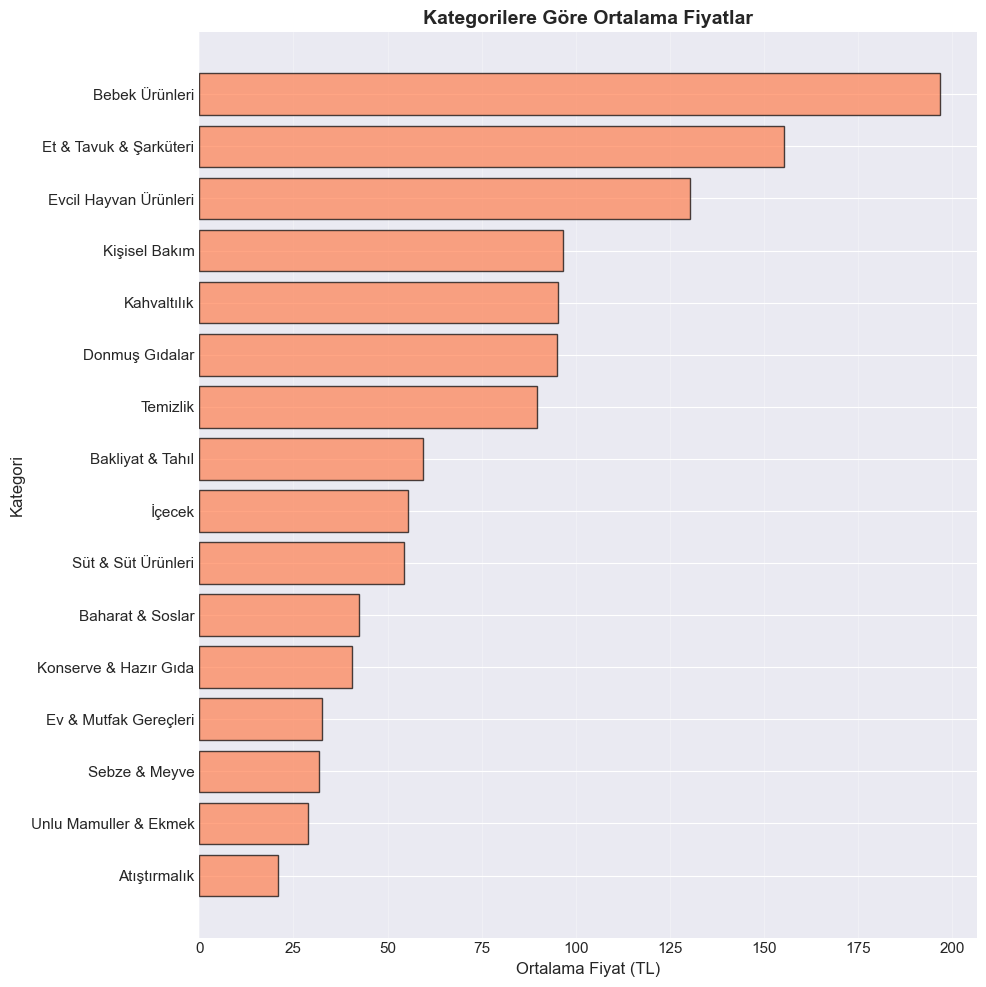

✅ Grafik kaydedildi: 04_kategori_ortalama.png


In [6]:
kategori_avg = df.groupby('kategori')['fiyat'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
plt.barh(kategori_avg.index, kategori_avg.values, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Ortalama Fiyat (TL)', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.title('Kategorilere Göre Ortalama Fiyatlar', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/04_kategori_ortalama.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 04_kategori_ortalama.png')

### 4.4 Zaman Serisi - Aylık Ortalama Fiyat (Line Plot)

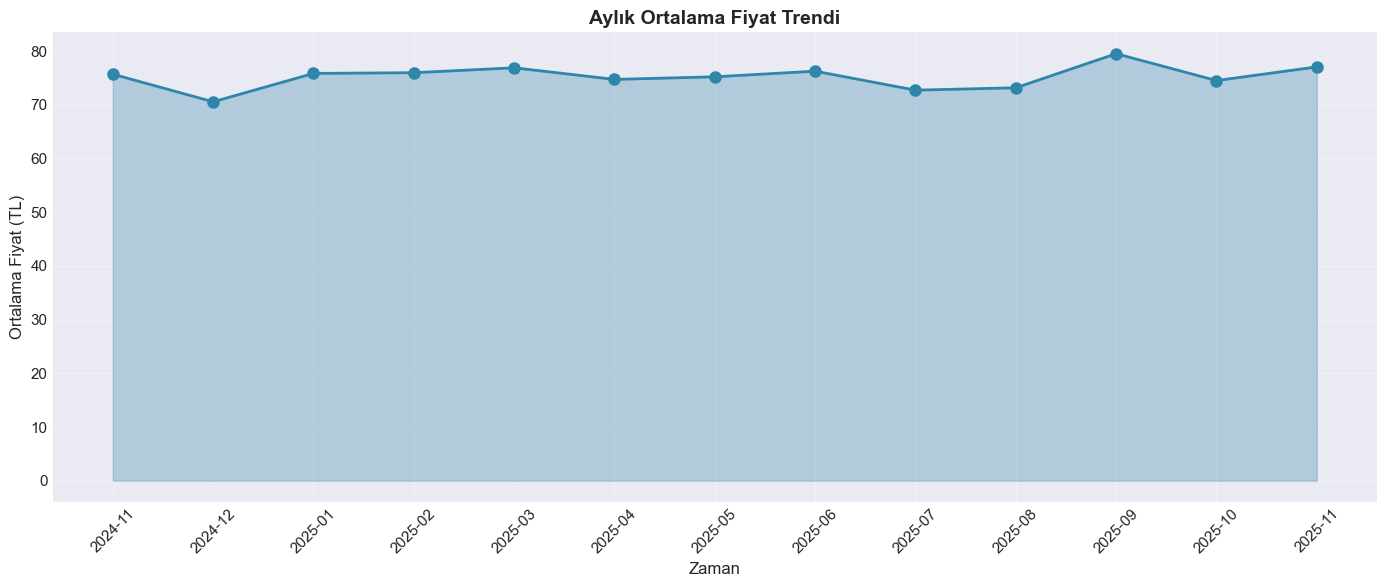

✅ Grafik kaydedildi: 05_aylik_trend.png


In [7]:
monthly_avg = df.groupby(['yil', 'ay'])['fiyat'].mean().reset_index()
monthly_avg['tarih_str'] = monthly_avg['yil'].astype(str) + '-' + monthly_avg['ay'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(range(len(monthly_avg)), monthly_avg['fiyat'], marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.fill_between(range(len(monthly_avg)), monthly_avg['fiyat'], alpha=0.3, color='#2E86AB')
plt.xlabel('Zaman', fontsize=12)
plt.ylabel('Ortalama Fiyat (TL)', fontsize=12)
plt.title('Aylık Ortalama Fiyat Trendi', fontsize=14, fontweight='bold')
plt.xticks(range(len(monthly_avg)), monthly_avg['tarih_str'], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/05_aylik_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 05_aylik_trend.png')

### 4.5 En Pahalı 10 Ürün (Horizontal Bar)

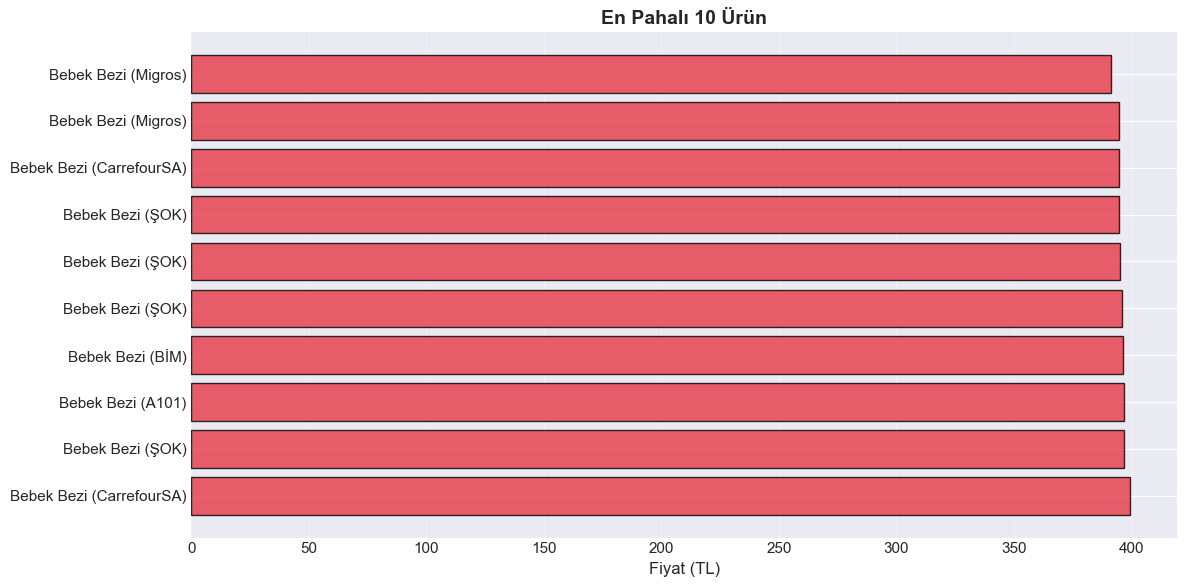

✅ Grafik kaydedildi: 06_en_pahali_urunler.png


In [8]:
top_10_expensive = df.nlargest(10, 'fiyat')[['urun_adi', 'fiyat', 'market_adi', 'kategori']]

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_10_expensive)), top_10_expensive['fiyat'], color='#E63946', edgecolor='black', alpha=0.8)
plt.yticks(range(len(top_10_expensive)), 
           [f"{row['urun_adi']} ({row['market_adi']})" for _, row in top_10_expensive.iterrows()])
plt.xlabel('Fiyat (TL)', fontsize=12)
plt.title('En Pahalı 10 Ürün', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/06_en_pahali_urunler.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 06_en_pahali_urunler.png')

### 4.6 En Ucuz 10 Ürün

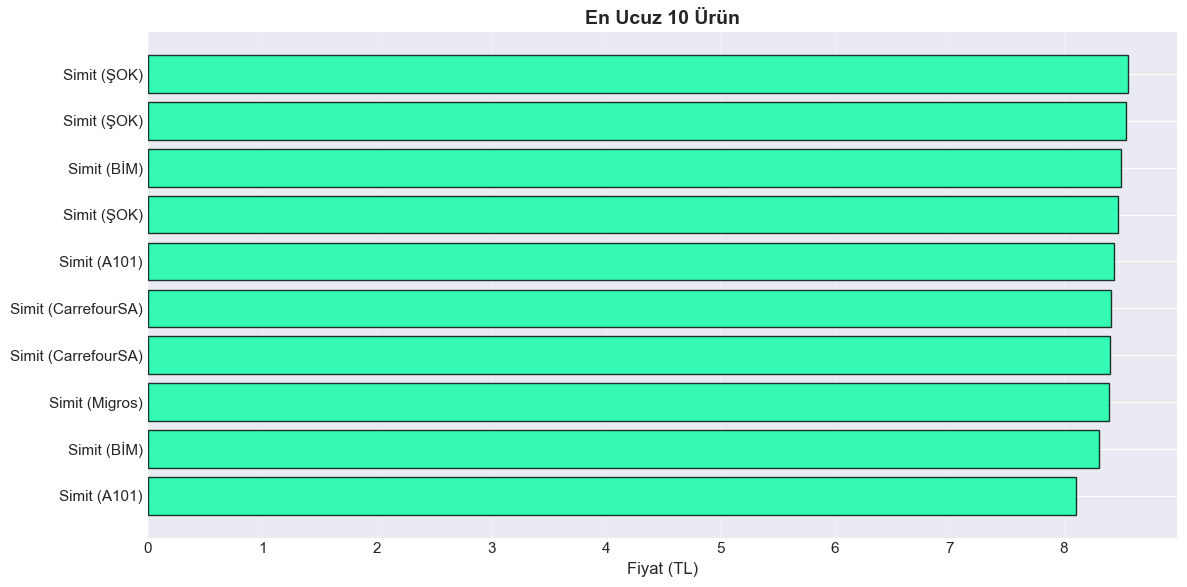

✅ Grafik kaydedildi: 07_en_ucuz_urunler.png


In [9]:
top_10_cheap = df.nsmallest(10, 'fiyat')[['urun_adi', 'fiyat', 'market_adi', 'kategori']]

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_10_cheap)), top_10_cheap['fiyat'], color='#06FFA5', edgecolor='black', alpha=0.8)
plt.yticks(range(len(top_10_cheap)), 
           [f"{row['urun_adi']} ({row['market_adi']})" for _, row in top_10_cheap.iterrows()])
plt.xlabel('Fiyat (TL)', fontsize=12)
plt.title('En Ucuz 10 Ürün', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/07_en_ucuz_urunler.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 07_en_ucuz_urunler.png')

### 4.7 Market Bazında Ürün Sayısı (Pie Chart)

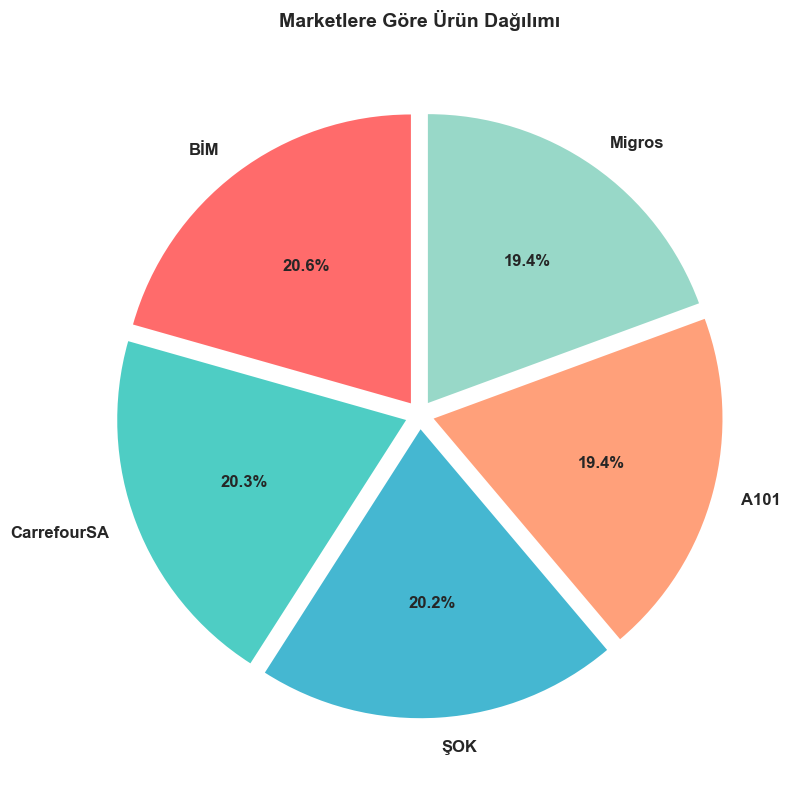

✅ Grafik kaydedildi: 08_market_dagilim.png


In [10]:
market_counts = df['market_adi'].value_counts()

plt.figure(figsize=(10, 8))
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
plt.pie(market_counts.values, labels=market_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors_pie, explode=[0.05]*len(market_counts),
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Marketlere Göre Ürün Dağılımı', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../outputs/figures/08_market_dagilim.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 08_market_dagilim.png')

### 4.8 Kategori Bazında Ürün Sayısı

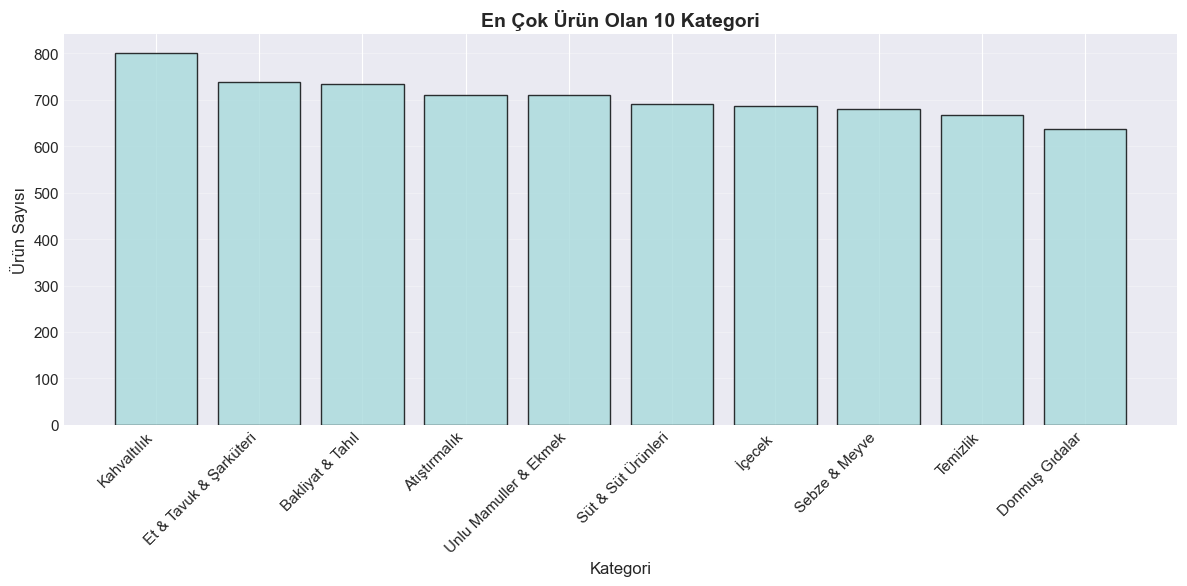

✅ Grafik kaydedildi: 09_kategori_urun_sayisi.png


In [11]:
kategori_counts = df['kategori'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(kategori_counts.index, kategori_counts.values, color='#A8DADC', edgecolor='black', alpha=0.8)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Ürün Sayısı', fontsize=12)
plt.title('En Çok Ürün Olan 10 Kategori', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/09_kategori_urun_sayisi.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 09_kategori_urun_sayisi.png')

### 4.9 Scatter Plot - Kategori vs Fiyat

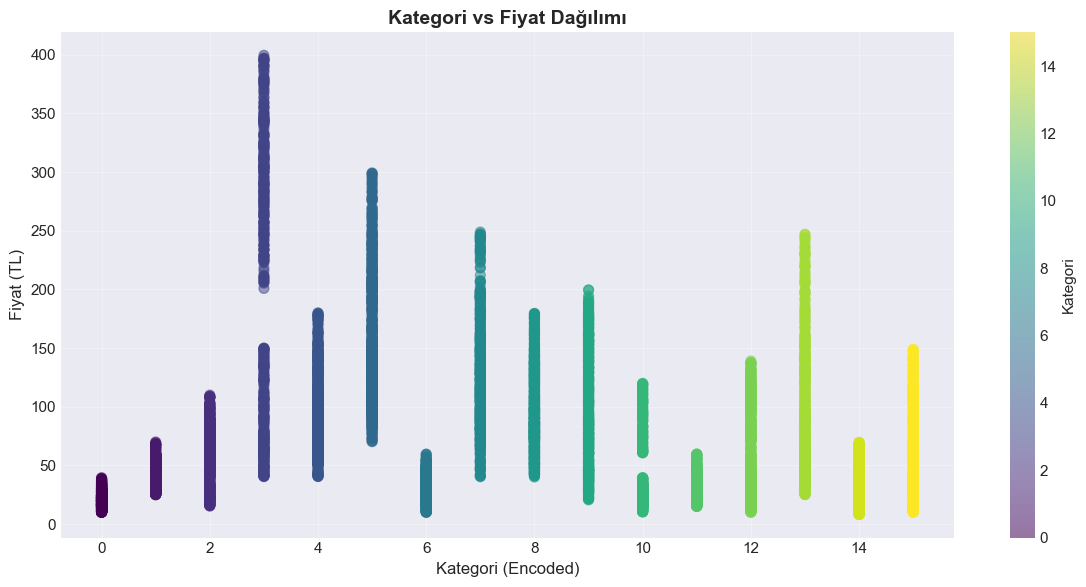

✅ Grafik kaydedildi: 10_kategori_fiyat_scatter.png


In [12]:
# Kategorileri encode et
kategori_encoded = pd.Categorical(df['kategori']).codes

plt.figure(figsize=(12, 6))
plt.scatter(kategori_encoded, df['fiyat'], alpha=0.5, c=kategori_encoded, cmap='viridis', s=50)
plt.xlabel('Kategori (Encoded)', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.title('Kategori vs Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.colorbar(label='Kategori')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/10_kategori_fiyat_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 10_kategori_fiyat_scatter.png')

### 4.10 Aylara Göre Ortalama Fiyat

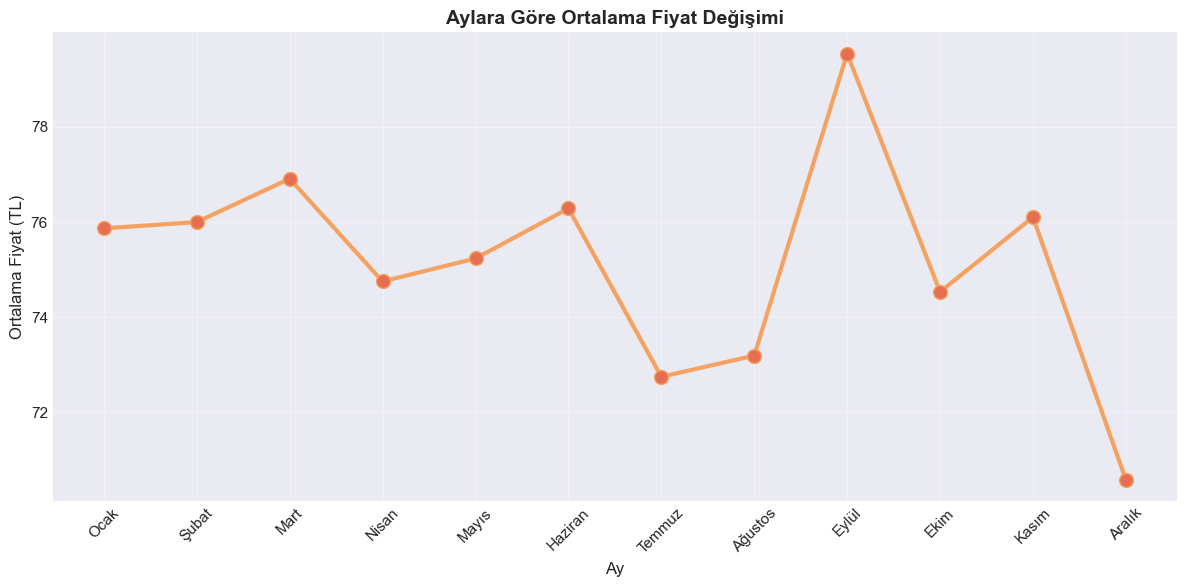

✅ Grafik kaydedildi: 11_aylik_ortalama.png


In [13]:
ay_ortalama = df.groupby('ay')['fiyat'].mean().sort_index()

ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

plt.figure(figsize=(12, 6))
plt.plot(ay_ortalama.index, ay_ortalama.values, marker='o', linewidth=3, 
         markersize=10, color='#F4A261', markerfacecolor='#E76F51')
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Ortalama Fiyat (TL)', fontsize=12)
plt.title('Aylara Göre Ortalama Fiyat Değişimi', fontsize=14, fontweight='bold')
plt.xticks(ay_ortalama.index, [ay_isimleri[i-1] for i in ay_ortalama.index], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/11_aylik_ortalama.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 11_aylik_ortalama.png')

## 5. SEABORN GÖRSELLEŞTİRMELERİ

### 5.1 Box Plot - Market Bazında Fiyat Dağılımı

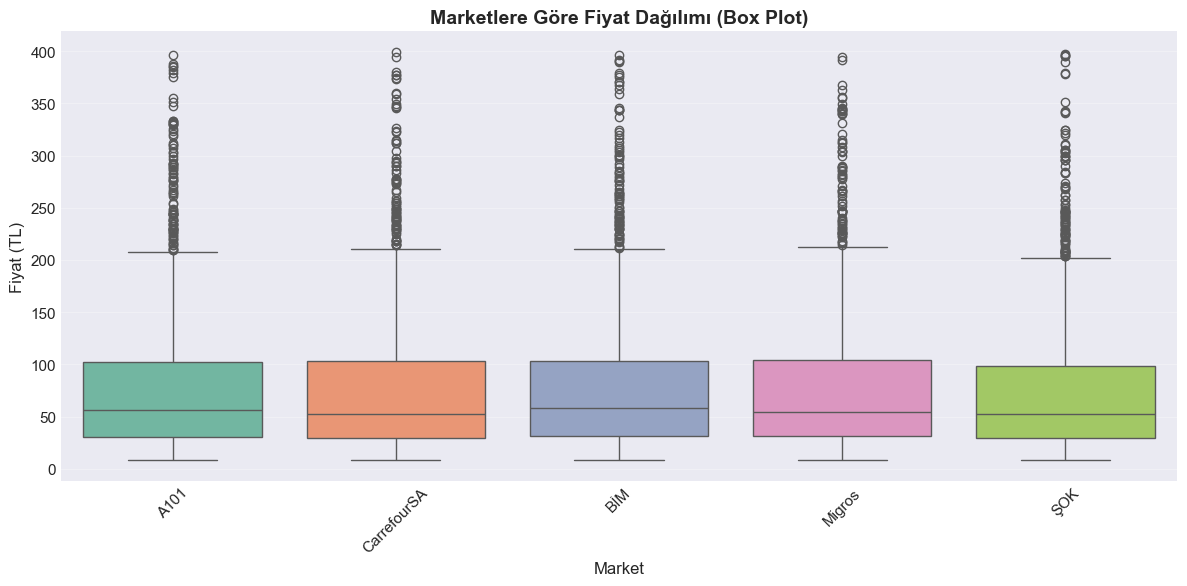

✅ Grafik kaydedildi: 12_market_boxplot.png


In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='market_adi', y='fiyat', palette='Set2')
plt.xlabel('Market', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.title('Marketlere Göre Fiyat Dağılımı (Box Plot)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/12_market_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 12_market_boxplot.png')

### 5.2 Violin Plot - Market Bazında Fiyat

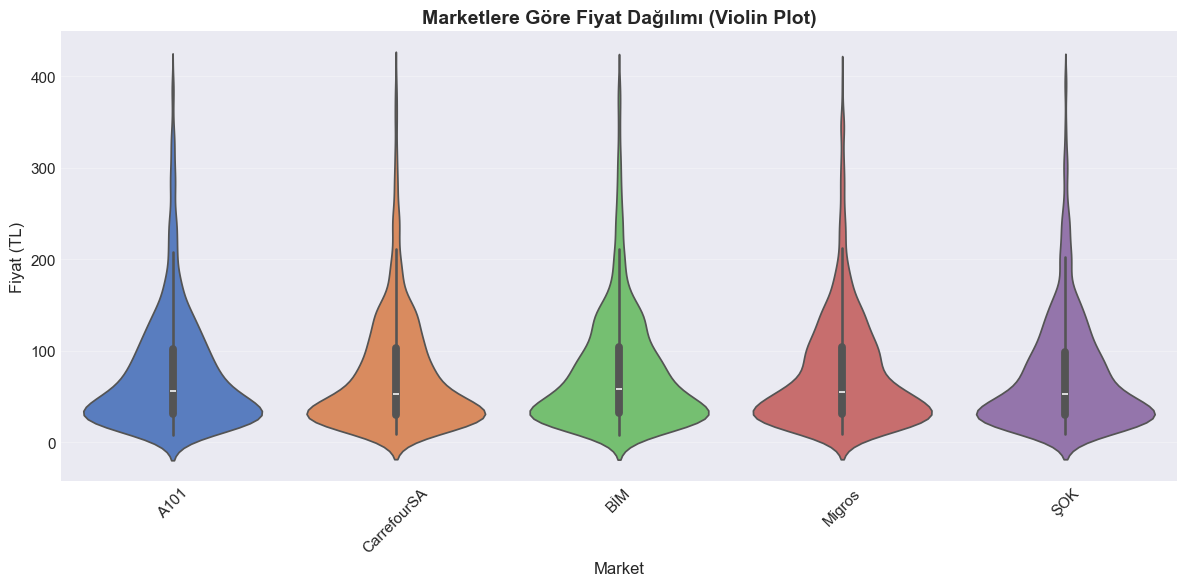

✅ Grafik kaydedildi: 13_market_violinplot.png


In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='market_adi', y='fiyat', palette='muted')
plt.xlabel('Market', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.title('Marketlere Göre Fiyat Dağılımı (Violin Plot)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/13_market_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 13_market_violinplot.png')

### 5.3 Heatmap - Market ve Kategori İlişkisi

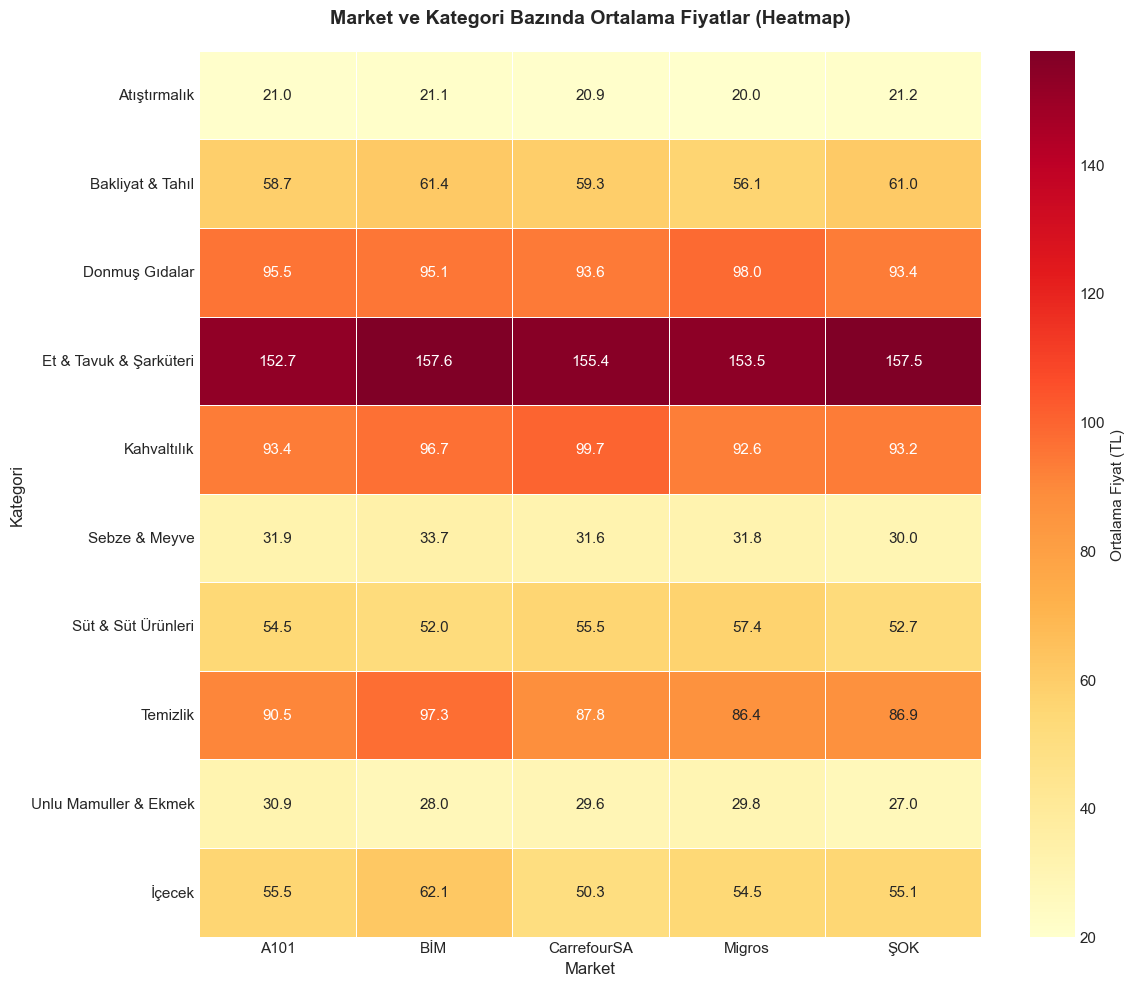

✅ Grafik kaydedildi: 14_market_kategori_heatmap.png


In [16]:
# En yaygın 10 kategori
top_categories = df['kategori'].value_counts().head(10).index
df_filtered = df[df['kategori'].isin(top_categories)]

pivot_table = df_filtered.pivot_table(values='fiyat', index='kategori', columns='market_adi', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Ortalama Fiyat (TL)'})
plt.title('Market ve Kategori Bazında Ortalama Fiyatlar (Heatmap)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/figures/14_market_kategori_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 14_market_kategori_heatmap.png')

### 5.4 Count Plot - Kategorilerdeki Ürün Sayısı

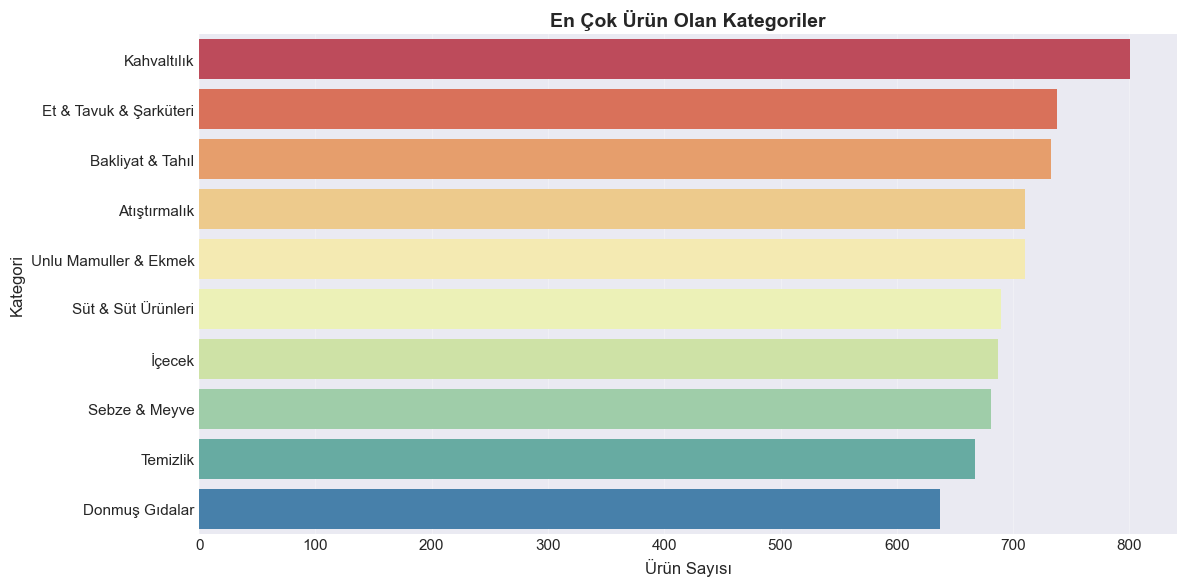

✅ Grafik kaydedildi: 15_kategori_countplot.png


In [17]:
top_10_kat = df['kategori'].value_counts().head(10).index
df_top_kat = df[df['kategori'].isin(top_10_kat)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_kat, y='kategori', order=top_10_kat, palette='Spectral')
plt.xlabel('Ürün Sayısı', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.title('En Çok Ürün Olan Kategoriler', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/15_kategori_countplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 15_kategori_countplot.png')

### 5.5 Distribution Plot - Fiyat Dağılımı

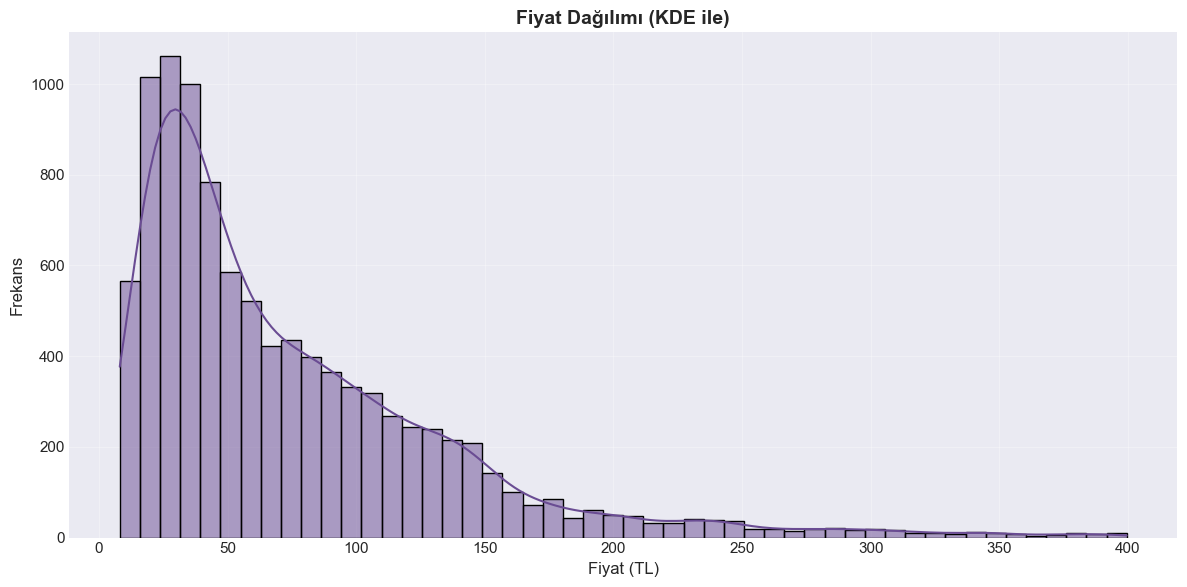

✅ Grafik kaydedildi: 16_fiyat_distplot.png


In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['fiyat'], bins=50, kde=True, color='#6A4C93')
plt.xlabel('Fiyat (TL)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.title('Fiyat Dağılımı (KDE ile)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/16_fiyat_distplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 16_fiyat_distplot.png')

### 5.6 Joint Plot - Ay vs Fiyat

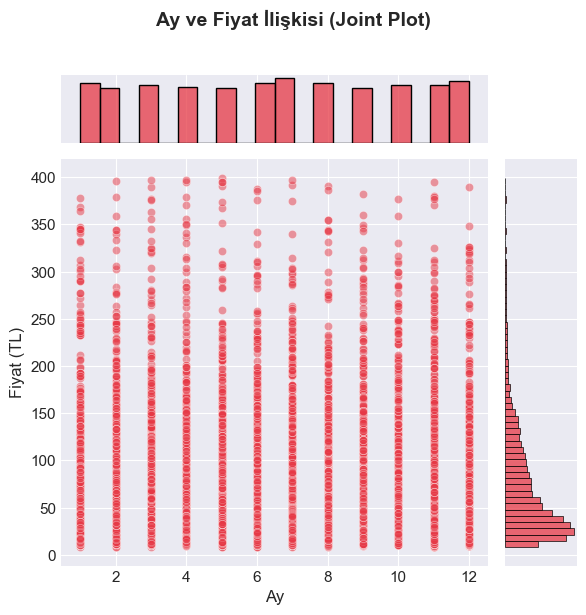

✅ Grafik kaydedildi: 17_ay_fiyat_jointplot.png


In [19]:
g = sns.jointplot(data=df, x='ay', y='fiyat', kind='scatter', color='#E63946', alpha=0.5)
g.fig.suptitle('Ay ve Fiyat İlişkisi (Joint Plot)', fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels('Ay', 'Fiyat (TL)', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/figures/17_ay_fiyat_jointplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 17_ay_fiyat_jointplot.png')

### 5.7 Pair Plot - Numerik Değişkenler Arası İlişki

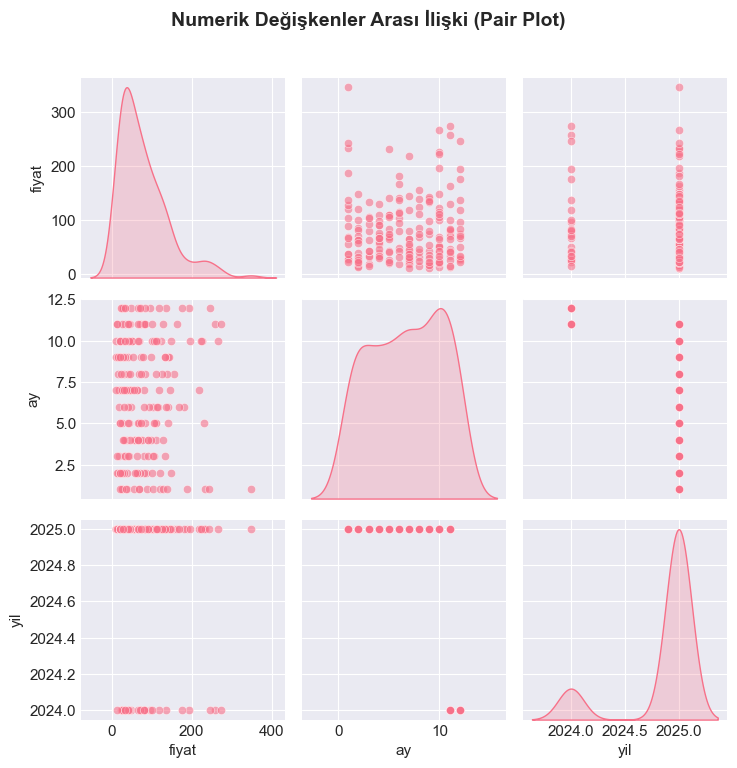

✅ Grafik kaydedildi: 18_pairplot.png


In [20]:
# Alt örnekleme yaparak performansı artır
df_sample = df.sample(n=min(200, len(df)), random_state=42)

g = sns.pairplot(df_sample[['fiyat', 'ay', 'yil']], diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Numerik Değişkenler Arası İlişki (Pair Plot)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/18_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 18_pairplot.png')

### 5.8 Swarm Plot - Market ve Fiyat (Küçük Örnek)

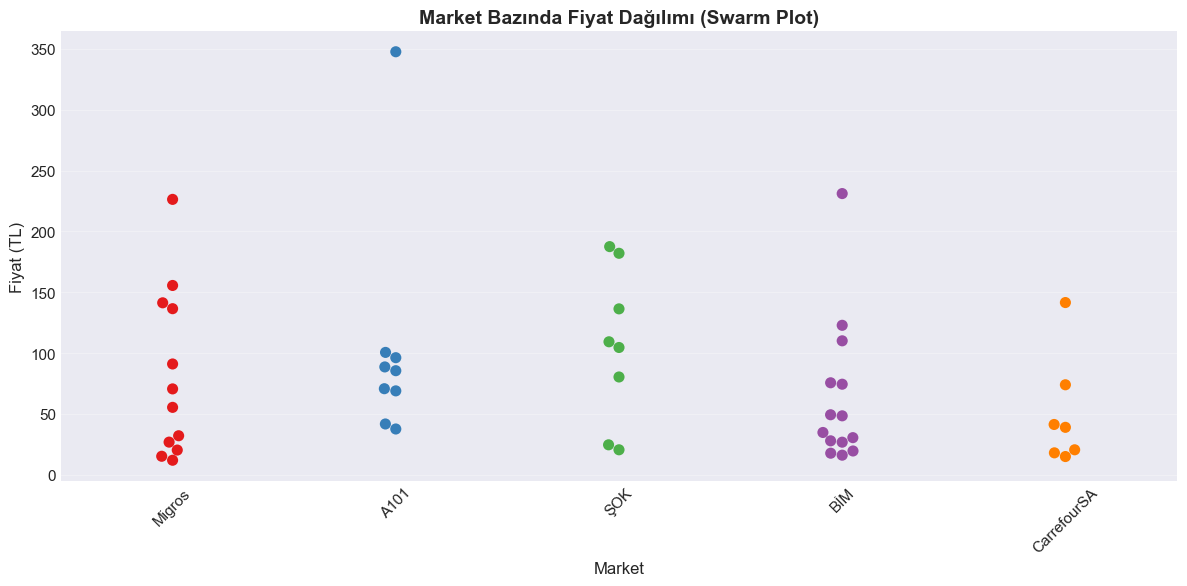

✅ Grafik kaydedildi: 19_market_swarmplot.png


In [21]:
# Rastgele 50 ürün seç
df_swarm = df.sample(n=min(50, len(df)), random_state=42)

plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_swarm, x='market_adi', y='fiyat', palette='Set1', size=8)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.title('Market Bazında Fiyat Dağılımı (Swarm Plot)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/19_market_swarmplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 19_market_swarmplot.png')

### 5.9 Bar Plot - Market ve Kategori Karşılaştırması

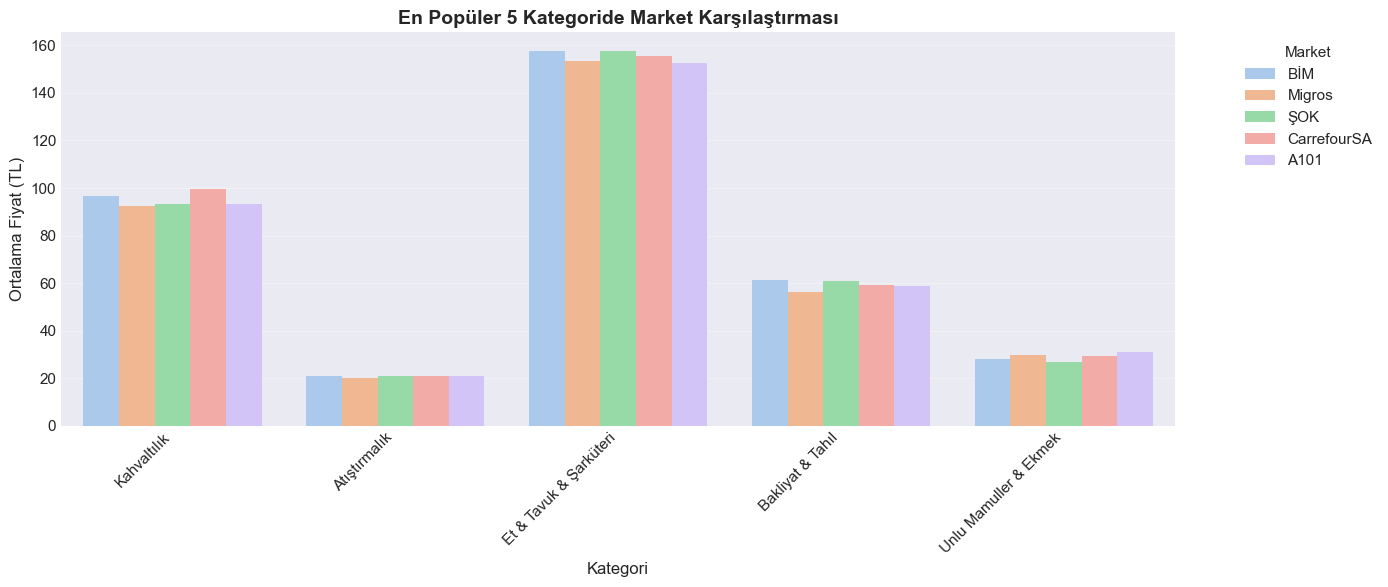

✅ Grafik kaydedildi: 20_kategori_market_barplot.png


In [22]:
top_5_kat = df['kategori'].value_counts().head(5).index
df_top5 = df[df['kategori'].isin(top_5_kat)]

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top5, x='kategori', y='fiyat', hue='market_adi', ci=None, palette='pastel')
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Ortalama Fiyat (TL)', fontsize=12)
plt.title('En Popüler 5 Kategoride Market Karşılaştırması', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/20_kategori_market_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 20_kategori_market_barplot.png')

### 5.10 Korelasyon Matrisi

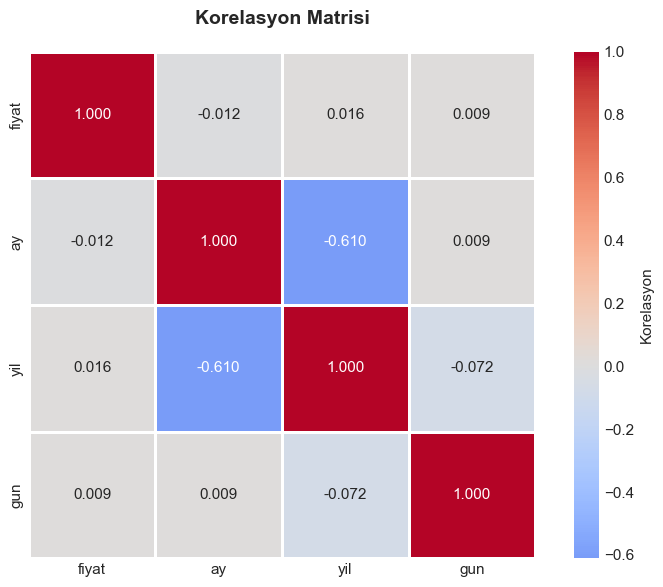

✅ Grafik kaydedildi: 21_korelasyon_matrisi.png


In [23]:
# Numerik sütunlar için korelasyon
numeric_cols = ['fiyat', 'ay', 'yil', 'gun']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Korelasyon'})
plt.title('Korelasyon Matrisi', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../outputs/figures/21_korelasyon_matrisi.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Grafik kaydedildi: 21_korelasyon_matrisi.png')

## 6. Özet Bulgular

In [24]:
print('='*60)
print('📊 GÖRSELLEŞTİRME ÖZETİ')
print('='*60)

print('\n✅ OLUŞTURULAN GRAFİKLER:')
print('   📈 Matplotlib: 11 grafik')
print('   📊 Seaborn: 10 grafik')
print('   🎯 TOPLAM: 21 görselleştirme')

print('\n💡 ANA BULGULAR:')
print(f"   - En ucuz market: {market_avg.index[-1]} (Ort: {market_avg.values[-1]:.2f} TL)")
print(f"   - En pahalı market: {market_avg.index[0]} (Ort: {market_avg.values[0]:.2f} TL)")
print(f"   - Genel ortalama fiyat: {df['fiyat'].mean():.2f} TL")

print('\n📂 Tüm grafikler outputs/figures/ klasörüne kaydedildi!')
print('\n✅ EDA tamamlandı! Sonraki adım: 03_linear_regression.ipynb')

📊 GÖRSELLEŞTİRME ÖZETİ

✅ OLUŞTURULAN GRAFİKLER:
   📈 Matplotlib: 11 grafik
   📊 Seaborn: 10 grafik
   🎯 TOPLAM: 21 görselleştirme

💡 ANA BULGULAR:
   - En ucuz market: CarrefourSA (Ort: 73.63 TL)
   - En pahalı market: BİM (Ort: 76.80 TL)
   - Genel ortalama fiyat: 75.07 TL

📂 Tüm grafikler outputs/figures/ klasörüne kaydedildi!

✅ EDA tamamlandı! Sonraki adım: 03_linear_regression.ipynb
